# Hàm Hỗ Trợ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/NghienCuuKhoaLuan/spmf.jar' .
import os
assert os.path.exists("spmf.jar"), "File spmf.jar chưa tồn tại trong thư mục hiện tại"

In [ ]:
import subprocess

def run_spmf(algorithm: str, input_file: str, output_file: str, **params):
    cmd = [
        "java", "-jar", "spmf.jar",
        "run", algorithm, input_file, output_file ]

    for v in params.values():
        cmd.append(str(v))

    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    print(result.stdout)
    if result.stderr:
        print("Lỗi:", result.stderr)

In [ ]:
def count_patterns_in_file(output_path):
    """
    Đếm số mẫu (dòng) trong file kết quả output GSP.
    Mỗi dòng tương ứng 1 frequent sequence.
    """
    with open(output_path, "r") as f:
        return sum(1 for _ in f)

In [ ]:
import time
import tracemalloc

def benchmark(func):
    """
    Đo thời gian và bộ nhớ khi chạy 1 hàm.
    """
    tracemalloc.start()
    start_time = time.perf_counter()

    result = func()

    end_time = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    print(f"Thời gian thực thi: {(end_time - start_time)*1000:.4f}ms")
    print(f"Bộ nhớ đỉnh (mb): {peak / 1024 / 1024:.2f}")

***Hàm so khớp***

**SPM**

In [ ]:
from typing import List, Tuple

def load_patterns(file_path: str) -> List[Tuple[Tuple[int, ...], int]]:
    """
    Đọc file kết quả khai phá mẫu.
    Trả về list gồm (chuỗi_pattern, support).
    """
    patterns = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if "#SUP:" in line:
                parts = line.strip().split("#SUP:")
                seq_str, sup_str = parts[0].strip(), parts[1].strip()
                # bỏ -1, chỉ giữ lại item
                items = tuple(int(x) for x in seq_str.split() if x != "-1")
                sup = int(sup_str)
                patterns.append((items, sup))
    return patterns

def compare_patterns(file_my: str, file_spmf: str, tolerance: int = 5) -> float:
    """
    So khớp file SPM với file SPMF (tiêu chuẩn).
    - Kiểm tra xem pattern trong SPM có tồn tại trong SPMF không.
    - Chênh lệch #SUP không quá 'tolerance'.
    Trả về % độ phủ.
    """
    patterns_my = load_patterns(file_my)
    patterns_spmf = load_patterns(file_spmf)

    # Dùng dict để tra cứu nhanh
    spmf_dict = {pat: sup for pat, sup in patterns_spmf}

    matches = 0
    for pat, sup in patterns_my:
        if pat in spmf_dict:
            if abs(sup - spmf_dict[pat]) <= tolerance:
                matches += 1

    coverage = matches / len(patterns_my) * 100 if patterns_my else 0
    return min(coverage, 100.0)




**PPM**

In [ ]:
from typing import List, Tuple, Set

def load_itemsets(file_path: str) -> List[Tuple[frozenset, int]]:
    """
    Đọc file PFPM output.
    Trả về list gồm (itemset dưới dạng frozenset, support).
    """
    patterns = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if "#SUP:" in line:
                # tách thành 2 phần: itemset và thông tin support trở đi
                parts = line.strip().split("#SUP:")
                seq_str, sup_str = parts[0].strip(), parts[1].strip()
                # lấy phần tử số ở đầu dòng (itemset, bỏ qua thứ tự)
                items = frozenset(int(x) for x in seq_str.split() if x.isdigit())
                # lấy giá trị ngay sau #SUP
                sup_val = sup_str.split()[0]
                sup = int(sup_val)
                patterns.append((items, sup))
    return patterns

def compare_itemsets(file_my: str, file_spmf: str, tolerance: int = 5) -> float:
    """
    So khớp file MyPFPM với file SPMF (tiêu chuẩn).
    - Itemset được so khớp không phân biệt thứ tự.
    - SUP chênh lệch không quá tolerance.
    Trả về phần trăm độ phủ.
    """
    patterns_my = load_itemsets(file_my)
    patterns_spmf = load_itemsets(file_spmf)

    # Lưu SPMF thành dict để tra cứu nhanh
    spmf_dict = {pat: sup for pat, sup in patterns_spmf}

    matches = 0
    for pat, sup in patterns_my:
        if pat in spmf_dict:
            if abs(sup - spmf_dict[pat]) <= tolerance:
                matches += 1

    coverage = matches / len(patterns_my) * 100 if patterns_my else 0
    return min(coverage, 100.0)

**PHM**

In [ ]:
from typing import List, Tuple, Set

def load_itemsets(file_path: str) -> List[Tuple[frozenset, int]]:
    """
    Đọc file PHM output.
    Trả về list gồm (itemset dưới dạng frozenset, utility).
    """
    patterns = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            if "#UTIL:" in line:
                # tách thành 2 phần: itemset và thông tin utility trở đi
                parts = line.strip().split("#UTIL:")
                seq_str, util_str = parts[0].strip(), parts[1].strip()
                # lấy phần tử số ở đầu dòng (itemset, bỏ qua thứ tự)
                items = frozenset(int(x) for x in seq_str.split() if x.isdigit())
                # lấy giá trị ngay sau #UTIL
                util_val = util_str.split()[0]
                util = int(util_val)
                patterns.append((items, util))
    return patterns

def compare_itemsets(file_my: str, file_spmf: str, tolerance: int = 5) -> float:
    """
    So khớp file MyPFPM với file SPMF (tiêu chuẩn).
    - Itemset được so khớp không phân biệt thứ tự.
    - UTIL chênh lệch không quá tolerance.
    Trả về phần trăm độ phủ.
    """
    patterns_my = load_itemsets(file_my)
    patterns_spmf = load_itemsets(file_spmf)

    # Lưu SPMF thành dict để tra cứu nhanh
    spmf_dict = {pat: util for pat, util in patterns_spmf}

    matches = 0
    for pat, util in patterns_my:
        if pat in spmf_dict:
            if abs(util - spmf_dict[pat]) <= tolerance:
                matches += 1

    coverage = matches / len(patterns_my) * 100 if patterns_my else 0
    return min(coverage, 100.0)

***HUSPM***

In [ ]:
from typing import List, Tuple

def load_uspan_patterns(file_path: str) -> List[Tuple[List[List[int]], int]]:
    """
    Đọc file USpan output (SPMF hoặc MyUSpan).
    Trả về list gồm (chuỗi tuần tự, utility).
    - Chuỗi: list các itemset, mỗi itemset là list[int].
    - Utility: int
    """
    patterns = []
    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            if "#UTIL:" in line:
                parts = line.strip().split("#UTIL:")
                seq_str, util_str = parts[0].strip(), parts[1].strip()

                # parse chuỗi thành list[itemset]
                seq = []
                current_itemset = []
                for tok in seq_str.split():
                    if tok == "-1":
                        if current_itemset:
                            seq.append(current_itemset)
                            current_itemset = []
                    elif tok.isdigit():
                        current_itemset.append(int(tok))
                if current_itemset:
                    seq.append(current_itemset)

                # parse utility
                util_tokens = [tok for tok in util_str.split() if tok.isdigit()]
                if not util_tokens:
                    continue
                util = int(util_tokens[0])

                patterns.append((seq, util))
    return patterns

def compare_uspan(file_my: str, file_spmf: str, tolerance: int = 5) -> float:
    """
    So khớp file MyUSpan với file SPMF USpan (chuẩn):
    - Thứ tự giữa các itemset trong sequence vẫn giữ nguyên.
    - Utility lệch không quá tolerance.
    Trả về % độ phủ.
    """
    def normalize_sequence(seq):
        # seq = list[list[int]] (danh sách itemset)
        return tuple(tuple(sorted(itemset)) for itemset in seq)

    patterns_my = load_uspan_patterns(file_my)
    patterns_spmf = load_uspan_patterns(file_spmf)

    # chuẩn hoá chuỗi để bỏ qua thứ tự trong itemset
    patterns_my = [(normalize_sequence(seq), util) for seq, util in patterns_my]
    patterns_spmf = [(normalize_sequence(seq), util) for seq, util in patterns_spmf]

    # lưu SPMF thành dict {chuỗi: utility}
    spmf_dict = {pat: util for pat, util in patterns_spmf}

    matches = 0
    for pat, util in patterns_my:
        if pat in spmf_dict:
            if abs(util - spmf_dict[pat]) <= tolerance:
                matches += 1

    coverage = matches / len(patterns_my) * 100 if patterns_my else 0
    return min(coverage, 100.0)

# **GSP**

In [ ]:
from collections import defaultdict

# F1: Load file
def load_sequence_database(filepath):
    sequences = []
    with open(filepath, 'r') as f:
        for line in f:
            tokens = line.strip().split()
            current_sequence = []
            current_itemset = set()
            for token in tokens:
                if token == "-1":
                    if current_itemset:
                        current_sequence.append(frozenset(current_itemset))
                        current_itemset = set()
                elif token == "-2":
                    if current_sequence:
                        sequences.append(tuple(current_sequence))
                        current_sequence = []
                else:
                    current_itemset.add(int(token))
            if current_itemset:
                current_sequence.append(frozenset(current_itemset))
            if current_sequence:
                sequences.append(tuple(current_sequence))
    return sequences

# F2: Frequent 1-item
def generate_frequent_1_sequences(sequences, minsup_abs):
    item_counts = defaultdict(int)
    for sequence in sequences:
        appeared = set()
        for itemset in sequence:
            for item in itemset:
                if item not in appeared:
                    appeared.add(item)
                    item_counts[item] += 1
    return { (frozenset([item]),): count for item, count in item_counts.items() if count >= minsup_abs }

# F3: Candidate generation
def generate_candidates_from_frequents(L_prev, k):
    candidates = set()
    sequences = list(L_prev.keys())
    for i in range(len(sequences)):
        for j in range(len(sequences)):
            s1, s2 = sequences[i], sequences[j]
            if k == 2:
                a, b = s1[0], s2[0]
                candidates.add((a, b))
                if a != b:
                    candidates.add((frozenset(set(a) | set(b)),))
            elif k > 2 and s1[1:] == s2[:-1]:
                last = s2[-1]
                candidates.add(s1 + (last,))
                if len(last) == 1:
                    merged = list(s1[:-1]) + [s1[-1] | last]
                    candidates.add(tuple(merged))
    return candidates

# F4: Subsequence check
def is_subsequence(candidate, sequence):
    cand_idx = 0
    seq_idx = 0
    while cand_idx < len(candidate) and seq_idx < len(sequence):
        if candidate[cand_idx].issubset(sequence[seq_idx]):
            cand_idx += 1
        seq_idx += 1
    return cand_idx == len(candidate)

# F5: Count support
def count_support(candidates, database, minsup_abs):
    support_count = defaultdict(int)
    for sequence in database:
        for cand in candidates:
            if is_subsequence(cand, sequence):
                support_count[cand] += 1
    return { cand: count for cand, count in support_count.items() if count >= minsup_abs }

# F6+F7+F8: GSP chạy trực tiếp và ghi ra file theo từng bước
def run_gsp_and_save(sequences, output_path, min_support_ratio=0.5):
    minsup_abs = int(len(sequences) * min_support_ratio)
    seen = set()

    with open(output_path, "w") as f:
        # Level 1
        L = generate_frequent_1_sequences(sequences, minsup_abs)
        for seq, sup in sorted(L.items()):
            if seq in seen:
                continue
            seen.add(seq)
            line = ""
            for itemset in seq:
                line += " ".join(str(i) for i in sorted(itemset)) + " -1 "
            line += f"#SUP: {sup}"
            f.write(line + "\n")

        # Level >= 2
        k = 2
        prev_keys = set(L.keys())

        while L:
            candidates = generate_candidates_from_frequents(L, k)
            L = count_support(candidates, sequences, minsup_abs)

            new_keys = set(L.keys())
            if not new_keys or new_keys.issubset(prev_keys):
                break
            prev_keys = new_keys

            for seq, sup in sorted(L.items()):
                if seq in seen:
                    continue
                seen.add(seq)
                line = ""
                for itemset in seq:
                    line += " ".join(str(i) for i in sorted(itemset)) + " -1 "
                line += f"#SUP: {sup}"
                f.write(line + "\n")

            k += 1


# F8: Chạy demo
def demo_run():
    sequences = load_sequence_database("input0.txt")
    run_gsp_and_save(sequences, "MyGSP_output.txt", min_support_ratio=0.75)




**version 2**

In [ ]:
from collections import defaultdict
from typing import List, Tuple, Dict, Iterable
from array import array
import bisect


# ===== I/O: compact loader (arrays instead of frozensets/tuples) =====
def load_sequence_database(filepath: str) -> Tuple[List[List[array]], str]:
    sequences: List[List[array]] = []
    max_item = 0
    with open(filepath, 'r') as f:
        for line in f:
            tokens = line.strip().split()
            if not tokens:
                continue
            seq: List[array] = []
            cur: List[int] = []
            for token in tokens:
                if token == '-1':
                    if cur:
                        cur.sort()
                        max_item = max(max_item, cur[-1])
                        cur_arr = array('I', cur)  # temporary; we'll downcast later
                        seq.append(cur_arr)
                        cur = []
                elif token == '-2':
                    break
                else:
                    cur.append(int(token))
            if cur:
                cur.sort()
                max_item = max(max_item, cur[-1])
                seq.append(array('I', cur))
            if seq:
                sequences.append(seq)

    # Downcast items to 16-bit if possible to halve memory
    code = 'H' if max_item <= 65535 else 'I'
    if code == 'H':
        for i in range(len(sequences)):
            sequences[i] = [array('H', itset) for itset in sequences[i]]
    return sequences, code


# ===== Formatting =====
def write_pattern(out, pat: List[List[int]], support: int) -> None:
    parts: List[str] = []
    for iset in pat:
        parts.extend(str(x) for x in iset)
        parts.append('-1')
    out.write(f"{' '.join(parts)} #SUP: {support}\n")


# ===== Utils =====
def items_of_sequence(seq: List[array]) -> array:
    # Unique items per sequence for fast presence filtering
    seen = set()
    flat: List[int] = []
    for iset in seq:
        for it in iset:
            if it not in seen:
                seen.add(int(it))
                flat.append(int(it))
    flat.sort()
    code = 'H' if (not flat or flat[-1] <= 65535) else 'I'
    return array(code, flat)


def is_subset_sorted(a: Iterable[int], b: array) -> bool:
    # a is small tuple/list; b is sorted array
    # Check every x in a exists in b via binary search
    for x in a:
        idx = bisect.bisect_left(b, x)
        if idx >= len(b) or b[idx] != x:
            return False
    return True


def itemset_subset(a: Tuple[int, ...], b: array) -> bool:
    # two-pointer subset: a and b are sorted
    i = j = 0
    la, lb = len(a), len(b)
    while i < la and j < lb:
        if a[i] == b[j]:
            i += 1
            j += 1
        elif a[i] > b[j]:
            j += 1
        else:
            return False
    return i == la


def is_subsequence(candidate: Tuple[Tuple[int, ...], ...], seq: List[array]) -> bool:
    # candidate: tuple of itemsets (each sorted tuple)
    si = 0
    for c_iset in candidate:
        found = False
        while si < len(seq):
            if itemset_subset(c_iset, seq[si]):
                found = True
                si += 1
                break
            si += 1
        if not found:
            return False
    return True


# ===== Level 1 =====
def generate_frequent_1_sequences(sequences: List[List[array]], minsup_abs: int) -> Dict[Tuple[Tuple[int, ...], ...], int]:
    item_counts = defaultdict(int)
    for seq in sequences:
        uniq = items_of_sequence(seq)
        for it in uniq:
            item_counts[int(it)] += 1
    return {((it,),): cnt for it, cnt in item_counts.items() if cnt >= minsup_abs}


# ===== Candidate generation with pruning =====
def all_k_minus_1_subseq(cand: Tuple[Tuple[int, ...], ...]) -> Iterable[Tuple[Tuple[int, ...], ...]]:
    k = len(cand)
    # Remove one item from some itemset (skip empty itemsets), or remove last itemset if becomes empty
    for i in range(k):
        iset = cand[i]
        if len(iset) == 1:
            # remove entire itemset
            yield cand[:i] + cand[i+1:]
        else:
            for j in range(len(iset)):
                new_iset = iset[:j] + iset[j+1:]
                yield cand[:i] + (new_iset,) + cand[i+1:]


def generate_candidates(L_prev: Dict[Tuple[Tuple[int, ...], ...], int], k: int) -> Iterable[Tuple[Tuple[int, ...], ...]]:
    keys = sorted(L_prev.keys())
    keyset = set(keys)
    for i in range(len(keys)):
        for j in range(len(keys)):
            s1, s2 = keys[i], keys[j]
            if k == 2:
                a, b = s1[0], s2[0]
                # S-step: (a)(b)
                yield (a, b)
                # I-step: (a∪b) if canonical to avoid duplicates
                if a <= b:
                    merged = tuple(sorted(set(a + b)))
                    yield (merged,)
            elif k > 2 and s1[1:] == s2[:-1]:
                last = s2[-1]
                # S-step candidate
                cand_s = s1 + (last,)
                # prune by (k-1)-subseq check
                if all(sub in L_prev for sub in all_k_minus_1_subseq(cand_s)):
                    yield cand_s
                # I-step: merge if single item
                if len(last) == 1:
                    merged_last = tuple(sorted(set(s1[-1] + last)))
                    cand_i = s1[:-1] + (merged_last,)
                    if all(sub in L_prev for sub in all_k_minus_1_subseq(cand_i)):
                        yield cand_i


# ===== Counting with presence filter and batching =====
def count_support_batched(candidates: List[Tuple[Tuple[int, ...], ...]],
                          sequences: List[List[array]],
                          seq_items: List[array],
                          minsup_abs: int,
                          batch: int = 50000) -> Dict[Tuple[Tuple[int, ...], ...], int]:
    result: Dict[Tuple[Tuple[int, ...], ...], int] = {}
    # Precompute candidate item presence signatures (sorted unique items)
    def cand_items(c: Tuple[Tuple[int, ...], ...]) -> Tuple[int, ...]:
        s = sorted({it for iset in c for it in iset})
        return tuple(s)

    idx = 0
    while idx < len(candidates):
        chunk = candidates[idx: idx + batch]
        idx += batch
        sup = defaultdict(int)
        c_items = [cand_items(c) for c in chunk]
        for sidx, seq in enumerate(sequences):
            items_arr = seq_items[sidx]
            for ci, cand in enumerate(chunk):
                # presence filter
                if not is_subset_sorted(c_items[ci], items_arr):
                    continue
                if is_subsequence(cand, seq):
                    sup[cand] += 1
        for cand, cnt in sup.items():
            if cnt >= minsup_abs:
                result[cand] = cnt
    return result


# ===== Driver =====
def run_gsp_and_save(input_path: str, output_path: str, min_support_ratio: float = 0.5) -> None:
    sequences, code = load_sequence_database(input_path)
    N = len(sequences)
    minsup_abs = max(1, int(N * min_support_ratio))

    # Precompute unique items per sequence (compact arrays)
    seq_items = [items_of_sequence(seq) for seq in sequences]

    with open(output_path, 'w') as f:
        # Level 1
        L = generate_frequent_1_sequences(sequences, minsup_abs)
        seen = set()
        for seq, sup in sorted(L.items()):
            if seq in seen:
                continue
            seen.add(seq)
            pat = [list(iset) for iset in seq]
            write_pattern(f, pat, sup)

        k = 2
        while L:
            # Generate candidates (stream) and collect into list for batched counting
            cand_list = list(generate_candidates(L, k))
            if not cand_list:
                break
            L = count_support_batched(cand_list, sequences, seq_items, minsup_abs)
            if not L:
                break
            for seq, sup in sorted(L.items()):
                if seq in seen:
                    continue
                seen.add(seq)
                pat = [list(iset) for iset in seq]
                write_pattern(f, pat, sup)
            k += 1


def demo_run():
    run_gsp_and_save('input0.txt', 'MyGSP_output.txt', min_support_ratio=0.75)

demo_run()


*Sample*

In [ ]:
benchmark(demo_run)
num_patterns = count_patterns_in_file("MyGSP_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 5.4621ms
Bộ nhớ đỉnh (mb): 0.02
Số mẫu tìm được: 14


In [ ]:
run_spmf("GSP", "input0.txt", "SPMF_GPS_output.txt", minsup=0.75)

>/content/spmf.jar
=============  Algorithm - STATISTICS =============
 Total time ~ 12 ms
 Frequent sequences count : 14
 Max memory (mb):6.3338165283203125




***Test***

In [ ]:
algorithm = "GSP"
input_file = "E-Shop.txt"
output_file = "E-Shop_SPMF_GSP_output.txt"
minsup = 0.5

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minsup}

>/content/spmf.jar
=============  Algorithm - STATISTICS =============
 Total time ~ 302 ms
 Frequent sequences count : 8
 Max memory (mb):41.3701171875



In [ ]:
def demo_run():
    run_gsp_and_save('E-Shop.txt', 'E-Shop_MyGSP_output.txt', min_support_ratio=0.5)


benchmark(demo_run)
num_patterns = count_patterns_in_file("E-Shop_MyGSP_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 23095.0880ms
Bộ nhớ đỉnh (mb): 19.99
Số mẫu tìm được: 8


In [ ]:
file_my = "E-Shop_MyGSP_output.txt"
file_spmf = "E-Shop_SPMF_GSP_output.txt"

coverage_percent = compare_patterns(file_my, file_spmf, tolerance=5)
print(f"Độ phủ MyGSP: {coverage_percent:.2f}%")

Độ phủ: 100.00%


# **SPADE**

In [ ]:
# ====== Cell 1: Cấu trúc dữ liệu cơ bản ======
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Set, Optional
from collections import defaultdict
import itertools

@dataclass(frozen=True)
class Item:
    value: int

@dataclass(frozen=True)
class Abstraction:
    after: bool  # True nếu là 'sau' (-1), False nếu 'cùng itemset'
    def __str__(self):
        return " -1" if self.after else ""

@dataclass(frozen=True)
class ItemAbstractionPair:
    item: Item
    abstraction: Abstraction
    def __str__(self):
        return f"{self.item.value}{str(self.abstraction)}"

@dataclass
class Pattern:
    elements: List[ItemAbstractionPair] = field(default_factory=list)
    appearing_in: Set[int] = field(default_factory=set)
    def support(self):
        return len(self.appearing_in)
    def to_string(self):
        return " ".join(str(e) for e in self.elements) + f" #SUP: {self.support()}"

# ====== Cell 2: Đọc dữ liệu và tạo vertical database ======
def read_spmf_sequence_database(filepath: str) -> Dict[int, List[List[int]]]:
    database = dict()
    with open(filepath, 'r') as f:
        for sid, line in enumerate(f):
            itemsets = []
            tokens = line.strip().split(" -1")
            for token in tokens:
                token = token.strip()
                if token == '' or token == '-2':
                    continue
                itemset = list(map(int, token.split()))
                itemsets.append(itemset)
            database[sid] = itemsets
    return database

# ====== Cell 3: Tạo IDList và EquivalenceClass chuẩn (standard map) ======
class IDList:
    def __init__(self):
        self.db: Dict[int, List[int]] = defaultdict(list)  # sid -> list of tids

    def add(self, sid: int, tid: int):
        self.db[sid].append(tid)

    def support(self):
        return len(self.db)

    def join(self, other: 'IDList', equals: bool) -> 'IDList':
        result = IDList()
        for sid in self.db:
            if sid in other.db:
                tids1 = self.db[sid]
                tids2 = other.db[sid]
                for t1 in tids1:
                    for t2 in tids2:
                        if (equals and t1 == t2) or (not equals and t1 < t2):
                            result.add(sid, t2)
        return result

@dataclass
class EquivalenceClass:
    class_id: Tuple[int, ...]
    members: List[Tuple[Pattern, IDList]]

# ====== Cell 4: Khởi tạo các pattern 1-item và IDList ======
def generate_frequent_1_patterns(db: Dict[int, List[List[int]]], min_sup: int):
    idlists: Dict[Tuple[int], IDList] = dict()
    for sid, itemsets in db.items():
        for tid, itemset in enumerate(itemsets):
            for item in itemset:
                key = (item,)
                if key not in idlists:
                    idlists[key] = IDList()
                idlists[key].add(sid, tid)

    patterns = []
    for key, idlist in idlists.items():
        if idlist.support() >= min_sup:
            pair = ItemAbstractionPair(Item(key[0]), Abstraction(False))
            pattern = Pattern([pair], set(idlist.db.keys()))
            patterns.append((pattern, idlist))
    return patterns

def generate_level2_patterns(level1_patterns: List[Tuple[Pattern, IDList]], min_sup: int):
    eqclasses = defaultdict(list)

    # Gom các 1-pattern thành class ID = ()
    for pattern, idlist in level1_patterns:
        eqclasses[()].append((pattern, idlist))

    level2_patterns = []

    for class_id, members in eqclasses.items():
        for i in range(len(members)):
            for j in range(len(members)):
                pat1, idlist1 = members[i]
                pat2, idlist2 = members[j]

                item1 = pat1.elements[-1].item
                item2 = pat2.elements[-1].item

                # Cùng itemset (a b)
                new_idlist_eq = idlist1.join(idlist2, equals=True)
                if new_idlist_eq.support() >= min_sup:
                    new_pattern = Pattern(
                        pat1.elements + [ItemAbstractionPair(item2, Abstraction(False))],
                        set(new_idlist_eq.db.keys())
                    )
                    level2_patterns.append((new_pattern, new_idlist_eq))

                # Sau itemset (a -1 b)
                new_idlist_af = idlist1.join(idlist2, equals=False)
                if new_idlist_af.support() >= min_sup:
                    new_pattern = Pattern(
                        pat1.elements + [ItemAbstractionPair(item2, Abstraction(True))],
                        set(new_idlist_af.db.keys())
                    )
                    level2_patterns.append((new_pattern, new_idlist_af))

    return level2_patterns


def spade_recursive_and_save(prefix: Pattern, idlist: IDList, candidates: List[Tuple[Pattern, IDList]], min_sup: int, output_path: str):
    with open(output_path, 'a') as f:
        f.write(prefix.to_string() + '\n')

    # Lấy class identifier: các phần tử prefix trừ phần tử cuối
    prefix_class_id = tuple((pair.item.value, pair.abstraction.after) for pair in prefix.elements[:-1])

    for cand, cand_idlist in candidates:
        cand_pair = cand.elements[-1]

        # Class ID của candidate phải bằng với prefix (trừ phần tử cuối)
        cand_class_id = tuple((pair.item.value, pair.abstraction.after) for pair in cand.elements[:-1])
        if cand_class_id != prefix_class_id:
            continue

        # Thử mở rộng theo 2 hướng
        for after in [False, True]:
            new_idlist = idlist.join(cand_idlist, equals=(not after))
            if new_idlist.support() >= min_sup:
                new_elements = prefix.elements + [ItemAbstractionPair(cand_pair.item, Abstraction(after))]
                new_pattern = Pattern(new_elements, set(new_idlist.db.keys()))
                spade_recursive_and_save(new_pattern, new_idlist, candidates, min_sup, output_path)

# ====== Cell 6: Chạy thuật toán chính ======
def run_spade_and_save(input_path: str, output_path: str, min_sup: float):
    db = read_spmf_sequence_database(input_path)
    total_seq = len(db)
    abs_min_sup = int(min_sup * total_seq)

    level1_patterns = generate_frequent_1_patterns(db, abs_min_sup)

    with open(output_path, 'w') as f:
        pass  # Xoá nội dung cũ

    for pattern, idlist in level1_patterns:
        spade_recursive_and_save(pattern, idlist, level1_patterns, abs_min_sup, output_path)

# F8: Chạy demo
def demo_run():
    run_spade_and_save("input0.txt", "MySPADE_output.txt", min_sup=0.75)



**version 2**

In [ ]:
from dataclasses import dataclass, field
from typing import List, Dict, Tuple, Set, Optional
from collections import defaultdict
import bisect


# =========================
# Data structures
# =========================

@dataclass(frozen=True)
class Item:
    value: int


@dataclass(frozen=True)
class ItemAbstractionPair:
    # new_itemset=True means this item starts a new itemset (i.e., there is a "-1" before it)
    item: Item
    new_itemset: bool  # False for first item, False for I-step, True for S-step


@dataclass
class Pattern:
    elements: List[ItemAbstractionPair] = field(default_factory=list)
    appearing_in: Set[int] = field(default_factory=set)

    def support(self) -> int:
        return len(self.appearing_in)

    def to_string(self) -> str:
        # Serialize pattern as SPMF sequence format: items inside itemset, then " -1" after each itemset
        parts: List[str] = []
        current_itemset: List[str] = []
        for idx, pair in enumerate(self.elements):
            if idx > 0 and pair.new_itemset:
                parts.append(" ".join(current_itemset) + " -1")
                current_itemset = []
            current_itemset.append(str(pair.item.value))
        if current_itemset:
            parts.append(" ".join(current_itemset) + " -1")
        return " ".join(parts) + f" #SUP: {self.support()}"


class IDList:
    """
    Vertical id-list: sid -> sorted unique list of tids (event ids).
    For a pattern, tids are the tids of the pattern's LAST item occurrence positions.
    """
    def __init__(self):
        self.db: Dict[int, List[int]] = defaultdict(list)

    def add(self, sid: int, tid: int):
        tids = self.db[sid]
        if not tids or tids[-1] != tid:
            tids.append(tid)

    def support(self) -> int:
        return len(self.db)

    def join(self, other: 'IDList', equals: bool) -> 'IDList':
        """
        equals=True  -> I-step (same itemset): intersection of tids per sid
        equals=False -> S-step (next itemset): all t2 in other.db[sid] such that exists t1 in self.db[sid] with t1 < t2.
                       Equivalent to t2 > min(self.db[sid]) since tids are sorted.
        """
        result = IDList()
        for sid, tids1 in self.db.items():
            tids2 = other.db.get(sid)
            if not tids2:
                continue

            if equals:
                # two-pointer intersection
                i, j = 0, 0
                while i < len(tids1) and j < len(tids2):
                    if tids1[i] == tids2[j]:
                        result.add(sid, tids1[i])
                        i += 1
                        j += 1
                    elif tids1[i] < tids2[j]:
                        i += 1
                    else:
                        j += 1
            else:
                # S-join: select all t2 > min(tids1)
                min_t1 = tids1[0]
                # first index in tids2 with value > min_t1
                k = bisect.bisect_right(tids2, min_t1)
                while k < len(tids2):
                    result.add(sid, tids2[k])
                    k += 1
        return result


# =========================
# I/O: read SPMF sequence DB
# =========================

def read_spmf_sequence_database(filepath: str) -> Dict[int, List[List[int]]]:
    """
    Input format per line: items separated by spaces, "-1" ends an itemset, "-2" ends a sequence.
    Example: "1 -1 1 2 3 -1 1 3 -1 4 -1 3 6 -1 -2"
    Returns: {sid: [[itemset1], [itemset2], ...]}
    """
    database: Dict[int, List[List[int]]] = dict()
    with open(filepath, 'r') as f:
        for sid, line in enumerate(f):
            line = line.strip()
            if not line:
                continue
            itemsets: List[List[int]] = []
            tokens = line.split(" -1")
            for token in tokens:
                token = token.strip()
                if token == '' or token == '-2':
                    continue
                itemset = list(map(int, token.split()))
                if itemset:
                    itemsets.append(itemset)
            database[sid] = itemsets
    return database


# =========================
# Frequent 1-patterns
# =========================

def generate_frequent_1_patterns(db: Dict[int, List[List[int]]], min_sup: int) -> List[Tuple[Pattern, IDList]]:
    """
    Build id-lists for 1-items and return frequent ones.
    """
    idlists_by_item: Dict[int, IDList] = dict()
    for sid, itemsets in db.items():
        for tid, itemset in enumerate(itemsets):
            for item in itemset:
                if item not in idlists_by_item:
                    idlists_by_item[item] = IDList()
                idlists_by_item[item].add(sid, tid)

    results: List[Tuple[Pattern, IDList]] = []
    for item_value, idlist in idlists_by_item.items():
        if idlist.support() >= min_sup:
            pair = ItemAbstractionPair(Item(item_value), new_itemset=False)  # first item, no boundary before
            pattern = Pattern([pair], set(idlist.db.keys()))
            results.append((pattern, idlist))

    # Sort by item value for consistent order
    results.sort(key=lambda x: x[0].elements[-1].item.value)
    return results


# =========================
# Recursive SPADE
# =========================

def last_item_value_in_current_itemset(prefix: Pattern) -> int:
    """
    Returns the last item value within the current (last) itemset of the pattern.
    """
    if not prefix.elements:
        return -10**9
    return prefix.elements[-1].item.value


def spade_recursive(prefix: Pattern,
                    prefix_idlist: IDList,
                    unigram_idlists: Dict[int, IDList],
                    min_sup: int,
                    output_path: str,
                    max_pattern_len: Optional[int] = None) -> None:
    """
    Write the prefix, then extend by I-step and S-step with pruning and ordering.
    """
    # Emit current pattern
    with open(output_path, 'a') as f:
        f.write(prefix.to_string() + '\n')

    if max_pattern_len is not None and len(prefix.elements) >= max_pattern_len:
        return

    # I-step: extend within the same itemset
    last_val = last_item_value_in_current_itemset(prefix)
    for cand_item_val in sorted(unigram_idlists.keys()):
        # Enforce non-decreasing order and no duplicates within itemset
        if cand_item_val <= last_val:
            continue
        cand_idlist = unigram_idlists[cand_item_val]
        i_join = prefix_idlist.join(cand_idlist, equals=True)
        if i_join.support() >= min_sup:
            new_elements = prefix.elements + [ItemAbstractionPair(Item(cand_item_val), new_itemset=False)]
            new_pattern = Pattern(new_elements, set(i_join.db.keys()))
            spade_recursive(new_pattern, i_join, unigram_idlists, min_sup, output_path, max_pattern_len)

    # S-step: extend to a new itemset (no ordering restriction across itemsets)
    for cand_item_val in sorted(unigram_idlists.keys()):
        cand_idlist = unigram_idlists[cand_item_val]
        s_join = prefix_idlist.join(cand_idlist, equals=False)
        if s_join.support() >= min_sup:
            new_elements = prefix.elements + [ItemAbstractionPair(Item(cand_item_val), new_itemset=True)]
            new_pattern = Pattern(new_elements, set(s_join.db.keys()))
            spade_recursive(new_pattern, s_join, unigram_idlists, min_sup, output_path, max_pattern_len)


# =========================
# Driver
# =========================

def run_spade_and_save(input_path: str, output_path: str, min_sup_ratio: float, max_pattern_len: Optional[int] = None) -> None:
    """
    min_sup_ratio is in [0,1]. Example: 0.75 for 75%.
    """
    db = read_spmf_sequence_database(input_path)
    total_seq = len(db)
    abs_min_sup = max(1, int(min_sup_ratio * total_seq))

    # Frequent 1-items and their id-lists
    level1 = generate_frequent_1_patterns(db, abs_min_sup)
    unigram_idlists: Dict[int, IDList] = {pat.elements[-1].item.value: idlist for pat, idlist in level1}

    # Reset output
    open(output_path, 'w').close()

    # Recurse from each frequent 1-item
    for pattern, idlist in level1:
        spade_recursive(pattern, idlist, unigram_idlists, abs_min_sup, output_path, max_pattern_len)


def demo_run():
    # Example usage for your sample
    run_spade_and_save("input0.txt", "MySPADE_output.txt", min_sup_ratio=0.75, max_pattern_len=None)


demo_run()

*Sample*

In [ ]:
benchmark(demo_run)
num_patterns = count_patterns_in_file("MySPADE_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 6.4355ms
Bộ nhớ đỉnh (mb): 0.02
Số mẫu tìm được: 14


In [ ]:
run_spmf("SPADE", "input0.txt", "SPMF_SPADE_output.txt", minsup=0.75)

>/content/spmf.jar
=============  Algorithm - STATISTICS =============
 Total time ~ 5 ms
 Frequent sequences count : 14
 Join count : 53
 Max memory (mb):6.32012939453125
Content at file SPMF_SPADE_output.txt




***Test***

In [ ]:
algorithm = "SPADE"
input_file = "E-Shop.txt"
output_file = "E-Shop_SPMF_SPADE_output.txt"
minsup = 0.5

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minsup}

>/content/spmf.jar
=============  Algorithm - STATISTICS =============
 Total time ~ 58 ms
 Frequent sequences count : 8
 Join count : 11
 Max memory (mb):312.20237731933594
Content at file E-Shop_SPMF_SPADE_output.txt



In [ ]:
def demo_run():
    run_spade_and_save("E-Shop.txt", "E-Shop_MySPADE_output.txt", min_sup_ratio=0.5)

benchmark(demo_run)
num_patterns = count_patterns_in_file("E-Shop_MySPADE_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 6101.6452ms
Bộ nhớ đỉnh (mb): 42.91
Số mẫu tìm được: 8


In [ ]:
file_my = "E-Shop_MySPADE_output.txt"
file_spmf = "E-Shop_SPMF_SPADE_output.txt"

coverage_percent = compare_patterns(file_my, file_spmf, tolerance=5)
print(f"Độ phủ MySPADE: {coverage_percent:.2f}%")

Độ phủ: 100.00%


# **PrefixSpan**

In [ ]:
# ====== Cell 1: Cấu trúc dữ liệu ======
from typing import List, Tuple, Dict
from collections import defaultdict
import copy

class Sequence:
    """Biểu diễn một chuỗi các itemset."""
    def __init__(self, itemsets: List[List[int]]):
        self.itemsets = itemsets

    def __repr__(self):
        return str(self.itemsets)

class Pattern:
    """Biểu diễn một mẫu tuần tự (sequence pattern)."""
    def __init__(self, itemsets: List[List[int]], support: int):
        self.itemsets = itemsets
        self.support = support

    def __repr__(self):
        return f"{self.itemsets} #SUP: {self.support}"

    def copy(self):
        return Pattern(copy.deepcopy(self.itemsets), self.support)

# ====== Cell 2: Đọc dữ liệu SPMF ======
def parse_spmf_format(text: str) -> List[Sequence]:
    """
    Parse SPMF input (dạng mỗi dòng là một chuỗi với -1 ngăn itemset, -2 ngăn chuỗi).
    Ví dụ: "1 2 -1 3 -1 -2"
    """
    sequences = []
    for line in text.strip().split('\n'):
        itemsets = []
        current_itemset = []
        for token in line.strip().split():
            if token == '-1':
                if current_itemset:
                    itemsets.append(current_itemset)
                    current_itemset = []
            elif token == '-2':
                break
            else:
                current_itemset.append(int(token))
        if itemsets:
            sequences.append(Sequence(itemsets))
    return sequences

# ====== Cell 3: Thuật toán PrefixSpan ======
def prefixspan_to_file(sequences: List[Sequence], output_path: str, min_sup_ratio: float):
    if not (0 < min_sup_ratio <= 1):
        raise ValueError("min_sup_ratio phải nằm trong khoảng (0, 1]")

    abs_min_sup = max(1, int(min_sup_ratio * len(sequences)))

    with open(output_path, 'w') as f:
        f.write("")  # Clear file

    frequent_items = find_frequent_items(sequences, abs_min_sup)
    for item, projected_db in frequent_items.items():
        pattern = Pattern([[item]], len(projected_db))
        append_pattern_to_file(pattern, output_path)
        recursive_prefixspan_to_file([[item]], projected_db, abs_min_sup, output_path)

def find_frequent_items(sequences: List[Sequence], min_sup: int) -> Dict[int, List[Tuple[int, Sequence]]]:
    freq = defaultdict(list)
    for sid, seq in enumerate(sequences):
        seen = set()
        for idx, itemset in enumerate(seq.itemsets):
            for item in itemset:
                if item not in seen:
                    freq[item].append((sid, trim_sequence(seq, idx + 1)))
                    seen.add(item)
    return {item: sids for item, sids in freq.items() if len(sids) >= min_sup}


def recursive_prefixspan_to_file(prefix: List[List[int]], projected_db: List[Tuple[int, Sequence]],
                                 min_sup: int, output_path: str):
    item_counts_same = defaultdict(list)
    item_counts_new = defaultdict(list)

    for sid, seq in projected_db:
        seen_same = set()
        seen_new = set()
        for idx, itemset in enumerate(seq.itemsets):
            for item in itemset:
                if item not in seen_new:
                    item_counts_new[item].append((sid, trim_sequence(seq, idx + 1)))
                    seen_new.add(item)
            if len(itemset) > 1:
                for item in itemset:
                    if item not in seen_same:
                        item_counts_same[item].append((sid, trim_sequence(seq, idx)))
                        seen_same.add(item)

    for item, proj_db in item_counts_same.items():
        if len(proj_db) >= min_sup:
            new_prefix = copy.deepcopy(prefix)
            new_prefix[-1].append(item)
            pattern = Pattern(new_prefix, len(proj_db))
            append_pattern_to_file(pattern, output_path)
            recursive_prefixspan_to_file(new_prefix, proj_db, min_sup, output_path)

    for item, proj_db in item_counts_new.items():
        if len(proj_db) >= min_sup:
            new_prefix = copy.deepcopy(prefix)
            new_prefix.append([item])
            pattern = Pattern(new_prefix, len(proj_db))
            append_pattern_to_file(pattern, output_path)
            recursive_prefixspan_to_file(new_prefix, proj_db, min_sup, output_path)

def append_pattern_to_file(pattern: Pattern, output_path: str):
    with open(output_path, 'a') as f:
        pattern_str = ' '.join(str(i) for itemset in pattern.itemsets for i in itemset)
        f.write(f"{pattern_str} #SUP: {pattern.support}\n")

def trim_sequence(seq: Sequence, start_idx: int) -> Sequence:
    return Sequence(seq.itemsets[start_idx:])

def demo_run():
    sequences = parse_spmf_format(open("input1.txt").read())
    prefixspan_to_file(sequences, "MyPrefixSpan_output.txt", min_sup_ratio=0.75)


**version 2**

In [ ]:
from typing import List, Tuple, Dict
from collections import defaultdict
from array import array
import bisect


def parse_spmf_file(path: str) -> List[List[array]]:
    sequences: List[List[array]] = []
    max_item = 0
    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith(('#', '%', '@')):
                continue
            itemsets_tmp: List[List[int]] = []
            cur: List[int] = []
            for tok in line.split():
                if tok == '-1':
                    if cur:
                        cur.sort()
                        if cur:
                            max_item = max(max_item, cur[-1])
                            itemsets_tmp.append(cur)
                        cur = []
                elif tok == '-2':
                    break
                else:
                    cur.append(int(tok))
            if itemsets_tmp:
                # Downcast items if possible to halve memory
                code = 'H' if max_item <= 65535 else 'I'
                itemsets_arr = [array(code, itset) for itset in itemsets_tmp]
                sequences.append(itemsets_arr)
    return sequences


def write_pattern(out, pattern: List[List[int]], support: int) -> None:
    # Stream pattern without copying
    parts: List[str] = []
    for iset in pattern:
        for it in iset:
            parts.append(str(it))
        parts.append('-1')
    out.write(f"{' '.join(parts)} #SUP: {support}\n")


class ProjConfig:
    def __init__(self, sid_code: str, ip_code: str):
        self.sid_code = sid_code  # 'H' or 'I' for sids
        self.ip_code = ip_code    # 'I' for 16+16, or 'H' for 8+8 packing


class ProjectedDB:
    def __init__(self, cfg: ProjConfig):
        self.cfg = cfg
        self.sids = array(cfg.sid_code)
        # packed iset/pos in one array (either 32-bit or 16-bit)
        self.ip = array(cfg.ip_code)
        self.isets = None
        self.pos = None
    def __len__(self) -> int:
        return len(self.sids)
    def append(self, sid: int, iset_idx: int, item_pos: int) -> None:
        self.sids.append(sid)
        if self.cfg.ip_code == 'I':
            self.ip.append(((iset_idx & 0xFFFF) << 16) | (item_pos & 0xFFFF))
        else:  # 'H' uses 8+8 packing
            self.ip.append(((iset_idx & 0xFF) << 8) | (item_pos & 0xFF))
    def iter_triples(self):
        if self.cfg.ip_code == 'I':
            for i in range(len(self.sids)):
                packed = self.ip[i]
                yield self.sids[i], (packed >> 16) & 0xFFFF, packed & 0xFFFF
        else:  # 'H' 8+8
            for i in range(len(self.sids)):
                packed = self.ip[i]
                yield self.sids[i], (packed >> 8) & 0xFF, packed & 0xFF


def mine_prefixspan(db: List[List[array]], out_path: str, min_sup_ratio: float) -> None:
    if not (0 < min_sup_ratio <= 1):
        raise ValueError('min_sup_ratio must be in (0,1]')
    N = len(db)
    min_sup = max(1, int(min_sup_ratio * N))

    # Clear output
    open(out_path, 'w').close()

    # Two-phase seeding: global counts only; build each seed's projection on demand
    seed_counts: Dict[int, int] = defaultdict(int)
    for sid, seq in enumerate(db):
        seen = set()
        for iset in seq:
            prev = None
            for it in iset:
                if prev is not None and it == prev:
                    continue
                prev = it
                if it not in seen:
                    seed_counts[int(it)] += 1
                    seen.add(int(it))

    freq_items = sorted([it for it, c in seed_counts.items() if c >= min_sup])
    # Compress frequent items to indices for array-based counting
    item_to_idx: Dict[int, int] = {it: idx for idx, it in enumerate(freq_items)}
    idx_to_item: List[int] = freq_items[:]

    pattern: List[List[int]] = []
    # Choose compact encoding for projected DBs
    # For small datasets (sid < 65536 and per-sequence iset/pos < 65536), shrink memory ~50%
    # Choose tighter packing for projected entries when safe
    # If number of itemsets and positions per sequence < 256, use 8+8 ('H'); else 16+16 ('I')
    # SIDs use 16-bit when N < 65536
    max_isets = max((len(seq) for seq in db), default=0)
    max_len_itemset = max((max((len(iset) for iset in seq), default=0) for seq in db), default=0)
    ip_code = 'H' if (max_isets < 256 and max_len_itemset < 256) else 'I'
    pack_cfg = ProjConfig('H' if N < 65536 else 'I', ip_code)

    with open(out_path, 'a', buffering=1 << 20) as out:
        for item in freq_items:
            proj = ProjectedDB(pack_cfg)
            # Build first occurrence per sequence using binary search
            for sid, seq in enumerate(db):
                found = False
                for iset_idx, iset in enumerate(seq):
                    idx = bisect.bisect_left(iset, item)
                    if idx < len(iset) and iset[idx] == item:
                        proj.append(sid, iset_idx, idx)
                        found = True
                        break
                # if not found, this sequence did not support the seed (won't happen by freq set)
            # Emit 1-length pattern
            pattern.append([item])
            write_pattern(out, pattern, len(proj))
            _project(db, pattern, proj, min_sup, out, item_to_idx, idx_to_item)
            pattern.pop()


def _project(db: List[List[array]],
             pattern: List[List[int]],
             proj_db: ProjectedDB,
             min_sup: int,
             out,
             item_to_idx: Dict[int, int],
             idx_to_item: List[int]) -> None:
    last_item_in_last_iset = pattern[-1][-1]

    # First pass: count candidates without storing per-sequence maps
    m = len(idx_to_item)
    # Array-based counters to avoid dict overhead; track touched indices to scan sparsely
    i_count = array('I', [0] * m)
    s_count = array('I', [0] * m)
    touched_i: List[int] = []
    touched_s: List[int] = []
    # Sequence-level mark array for S-step to avoid per-sequence sets
    marks = array('I', [0] * m)
    current_mark = 1

    for sid, iset_idx, item_pos in proj_db.iter_triples():
        seq = db[sid]
        # I-extensions (same itemset), dedup by previous value in sorted array
        iset = seq[iset_idx]
        prev_i = None
        for pos in range(item_pos + 1, len(iset)):
            it = iset[pos]
            if it < last_item_in_last_iset:
                continue
            if prev_i is not None and it == prev_i:
                continue
            prev_i = it
            idx = item_to_idx.get(int(it))
            if idx is None:
                continue
            if i_count[idx] == 0:
                touched_i.append(idx)
            i_count[idx] += 1

        # S-extensions (subsequent itemsets)
        for j in range(iset_idx + 1, len(seq)):
            prev2 = None
            for it2 in seq[j]:
                if prev2 is not None and it2 == prev2:
                    continue
                prev2 = it2
                idx = item_to_idx.get(int(it2))
                if idx is None:
                    continue
                if marks[idx] == current_mark:
                    continue
                marks[idx] = current_mark
                if s_count[idx] == 0:
                    touched_s.append(idx)
                s_count[idx] += 1
        current_mark += 1

    # Determine frequent candidates
    i_freq = sorted(idx_to_item[idx] for idx in touched_i if i_count[idx] >= min_sup)
    s_freq = sorted(idx_to_item[idx] for idx in touched_s if s_count[idx] >= min_sup)

    # Second pass: build projected DBs only for frequent candidates
    if i_freq:
        # Build one candidate at a time to minimize memory
        for it in i_freq:
            if it < last_item_in_last_iset:
                continue
            proj_next = ProjectedDB(proj_db.cfg)
            for sid, iset_idx, item_pos in proj_db.iter_triples():
                iset = db[sid][iset_idx]
                # find first occurrence of it after item_pos via bisect
                # lower bound value is max(it, last_item_in_last_iset)
                lb_val = it if it >= last_item_in_last_iset else last_item_in_last_iset
                idx = bisect.bisect_left(iset, lb_val, item_pos + 1)
                if idx < len(iset) and iset[idx] == it:
                    proj_next.append(sid, iset_idx, idx)
            if len(proj_next) >= min_sup:
                pattern[-1].append(it)
                write_pattern(out, pattern, len(proj_next))
                _project(db, pattern, proj_next, min_sup, out, item_to_idx, idx_to_item)
                pattern[-1].pop()

    if s_freq:
        for it in s_freq:
            proj_next = ProjectedDB(proj_db.cfg)
            for sid, iset_idx, item_pos in proj_db.iter_triples():
                seq = db[sid]
                # find earliest itemset > iset_idx containing it via bisect
                found = False
                for j in range(iset_idx + 1, len(seq)):
                    iset2 = seq[j]
                    idx2 = bisect.bisect_left(iset2, it)
                    if idx2 < len(iset2) and iset2[idx2] == it:
                        proj_next.append(sid, j, idx2)
                        found = True
                        break
                # if not found, skip this sequence
            if len(proj_next) >= min_sup:
                pattern.append([it])
                write_pattern(out, pattern, len(proj_next))
                _project(db, pattern, proj_next, min_sup, out, item_to_idx, idx_to_item)
                pattern.pop()


def prefixspan_to_file(input_path: str, output_path: str, min_sup_ratio: float) -> None:
    db = parse_spmf_file(input_path)
    mine_prefixspan(db, output_path, min_sup_ratio)


def demo_run(input_path: str = "input0.txt",
             output_path: str = "MyPrefixSpan_output.txt",
             min_sup_ratio: float = 0.75) -> None:
    prefixspan_to_file(input_path, output_path, min_sup_ratio)


demo_run()


*Sample*

In [ ]:
benchmark(demo_run)
num_patterns = count_patterns_in_file("MyPrefixSpan_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 9.0572ms
Bộ nhớ đỉnh (mb): 1.01
Số mẫu tìm được: 14


In [ ]:
run_spmf("PrefixSpan", "input0.txt", "SPMF_PrefixSpan_output.txt", minsup=0.75)

>/content/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 7 ms
 Frequent sequences count : 14
 Max memory (mb) : 5.9307403564453125
 minsup = 3 sequences.
 Pattern count : 14




***Test***

In [ ]:
algorithm = "PrefixSpan"
input_file = "E-Shop.txt"
output_file = "E-Shop_SPMF_PrefixSpan_output.txt"
minsup = 0.5

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minsup}

>/content/spmf.jar
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 777 ms
 Frequent sequences count : 8
 Max memory (mb) : 19.08745574951172
 minsup = 2917 sequences.
 Pattern count : 8



In [ ]:
def demo_run(input_path: str = "E-Shop.txt",
			 output_path: str = "E-Shop_MyPrefixSpan_output.txt",
			 min_sup_ratio: float = 0.5) -> None:
	prefixspan_to_file(input_path, output_path, min_sup_ratio)

benchmark(demo_run)
num_patterns = count_patterns_in_file("E-Shop_MyPrefixSpan_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 12126.7074ms
Bộ nhớ đỉnh (mb): 19.08
Số mẫu tìm được: 8


In [ ]:
file_my = "E-Shop_MyPrefixSpan_output.txt"
file_spmf = "E-Shop_SPMF_PrefixSpan_output.txt"

coverage_percent = compare_patterns(file_my, file_spmf, tolerance=5)
print(f"Độ phủ MyPrefixSpan: {coverage_percent:.2f}%")

Độ phủ MyPrefixSpan: 100.00%


# **PFPM**

In [ ]:
from typing import List, Tuple
from collections import defaultdict
import os

# ==== Bước 1: Đọc dữ liệu input ====
def load_transactions(path: str) -> List[List[int]]:
    with open(path, "r") as f:
        return [list(map(int, line.strip().split())) for line in f if line.strip()]

# ==== Bước 2: Xây dựng Vertical DB (item -> danh sách TID) ====
def build_vertical_db(transactions: List[List[int]]) -> dict:
    vdb = defaultdict(list)
    for tid, transaction in enumerate(transactions):
        for item in transaction:
            vdb[item].append(tid)
    return dict(vdb)

# ==== Bước 3: Giao các TID list ====
def intersect_tid_lists(list1: List[int], list2: List[int]) -> List[int]:
    return sorted(set(list1).intersection(list2))

# ==== Bước 4: Tính periodicity ====
def compute_periods(tids: List[int], total_transactions: int) -> List[int]:
    tids = sorted(tids)
    periods = [tids[0] + 1]
    for i in range(1, len(tids)):
        periods.append(tids[i] - tids[i-1])
    periods.append(total_transactions - tids[-1])
    return periods

def passes_constraints(tids: List[int], minper, maxper, minavgper, maxavgper, total_transactions: int) -> bool:
    periods = compute_periods(tids, total_transactions)
    return (min(periods) >= minper and
            max(periods) <= maxper and
            minavgper <= sum(periods)/len(periods) <= maxavgper)

# ==== Bước 5: In ra output nếu thỏa điều kiện PFPM ====
def output_result(itemset: Tuple[int], tids: List[int], output_file: str,
                  minper, maxper, minavgper, maxavgper, total_transactions: int):
    if not passes_constraints(tids, minper, maxper, minavgper, maxavgper, total_transactions):
        return
    periods = compute_periods(tids, total_transactions)
    sup = len(tids)
    minp = min(periods)
    maxp = max(periods)
    avgp = sum(periods) / len(periods)
    with open(output_file, "a") as f:
        f.write(f"{' '.join(map(str, itemset))} #SUP: {sup} #MINPER: {minp} #MAXPER: {maxp} #AVGPER: {avgp}\n")

# ==== Bước 6: Khai thác đệ quy theo kiểu Eclat ====
def generate_candidates(prefix: Tuple[int], tids: List[int], vdb: dict,
                        minper, maxper, minavgper, maxavgper, output, total_transactions):
    output_result(prefix, tids, output, minper, maxper, minavgper, maxavgper, total_transactions)
    for item in sorted(vdb):
        if prefix and item <= prefix[-1]:
            continue
        new_prefix = prefix + (item,)
        new_tids = intersect_tid_lists(tids, vdb[item])
        if len(new_tids) >= 2:
            generate_candidates(new_prefix, new_tids, vdb, minper, maxper, minavgper, maxavgper, output, total_transactions)

# ==== Bước 7: Hàm chính để chạy ====
def demo_run(input_path="input0.txt", output_path="output.txt",
             minper=1, maxper=3, minavgper=1, maxavgper=2):
    if os.path.exists(output_path):
        os.remove(output_path)
    transactions = load_transactions(input_path)
    vdb = build_vertical_db(transactions)
    total_transactions = len(transactions)
    for item, tids in vdb.items():
        generate_candidates((item,), tids, vdb, minper, maxper, minavgper, maxavgper, output_path, total_transactions)


#demo_run("input0.txt", "MyPFPM_output.txt")


*Sample*

In [ ]:
benchmark(demo_run)
num_patterns = count_patterns_in_file("MyPFPM_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 5.0301ms
Bộ nhớ đỉnh (mb): 0.02
Số mẫu tìm được: 11


In [ ]:
algorithm = "PFPM"
input_file = "input0.txt"
output_file = "SPMF_PFPM_output.txt"
minper = 1
maxper = 3
minavgper = 1
maxavgper = 2

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minper} {maxper} {minavgper} {maxavgper}

>/content/spmf.jar
=============  PFPM ALGORITHM v2.17 ESCP: true =====
 Database size: 7 transactions
 Time : 7.0 ms
 Memory ~ 5.90521240234375 MB
 Periodic Itemsets count : 11
 Candidate count : 6
 Gamma (support prunning threshold):2.5


***Test***

In [ ]:
algorithm = "PFPM"
input_file = "BMS_Web_View_1.txt"
output_file = "BMS_Web_View_1_SPMF_PFPM_output.txt"
minper = 200
maxper = 2000
minavgper = 200
maxavgper = 1500

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minper} {maxper} {minavgper} {maxavgper}

>/content/spmf.jar
=============  PFPM ALGORITHM v2.17 ESCP: true =====
 Database size: 4141 transactions
 Time : 389.0 ms
 Memory ~ 8.073028564453125 MB
 Periodic Itemsets count : 778
 Candidate count : 2190
 Gamma (support prunning threshold):1.7606666666666668


In [ ]:
def demo_run(input_path="BMS_Web_View_1.txt", output_path="BMS_Web_View_1_MyPFPM_output.txt",  minper=200, maxper=2000, minavgper=200, maxavgper=1500):
    if os.path.exists(output_path):
        os.remove(output_path)
    transactions = load_transactions(input_path)
    vdb = build_vertical_db(transactions)
    total_transactions = len(transactions)
    for item, tids in vdb.items():
        generate_candidates((item,), tids, vdb, minper, maxper, minavgper, maxavgper, output_path, total_transactions)

benchmark(demo_run)
num_patterns = count_patterns_in_file("BMS_Web_View_1_MyPFPM_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 17637.5311ms
Bộ nhớ đỉnh (mb): 1.47
Số mẫu tìm được: 742


In [ ]:
file_my_pfpm = "BMS_Web_View_1_MyPFPM_output.txt"
file_spmf_pfpm = "BMS_Web_View_1_SPMF_PFPM_output.txt"

coverage = compare_itemsets(file_my_pfpm, file_spmf_pfpm, tolerance=5)
print(f"Độ phủ MyPFPM: {coverage:.2f}%")

Độ phủ: 100.00%


# **PHM**

In [ ]:
from collections import defaultdict

class Element:
    def __init__(self, tid: int, iutils: int, rutils: int):
        self.tid = tid
        self.iutils = iutils
        self.rutils = rutils

class UtilityListPHM:
    def __init__(self, item: int):
        self.item = item
        self.elements = []
        self.sumIutils = 0
        self.sumRutils = 0
        self.largestPeriodicity = 0
        self.smallestPeriodicity = float("inf")

    def add_element(self, element: Element):
        self.elements.append(element)
        self.sumIutils += element.iutils
        self.sumRutils += element.rutils

    def get_support(self):
        return len(self.elements)

# === Load database ===
def load_transactions(path):
    db = []
    with open(path, "r") as f:
        for tid, line in enumerate(f):
            parts = line.strip().split(":")
            if len(parts) != 3:
                continue
            items = list(map(int, parts[0].split()))
            tu = int(parts[1])
            utils = list(map(int, parts[2].split()))
            db.append((tid, items, utils, tu))
    return db

# === First pass: build UL for all single items ===
def first_pass_transactions(db):
    mapUL = {}
    mapTWU = defaultdict(int)
    for tid, items, utils, tu in db:
        for idx, item in enumerate(items):
            mapTWU[item] += tu
            ul = mapUL.setdefault(item, UtilityListPHM(item))
            ul.add_element(Element(tid, utils[idx], sum(utils[idx+1:])))
    return mapUL, mapTWU

# === Periodicity calculation ===
def compute_periodicities(ul: UtilityListPHM, total_size: int):
    tids = [e.tid for e in ul.elements]
    if not tids:
        return [], 0, 0, 0
    periods = [tids[i+1] - tids[i] for i in range(len(tids)-1)]
    periods.append(total_size - tids[-1])
    ul.largestPeriodicity = max(periods)
    ul.smallestPeriodicity = min(periods)
    avgp = sum(periods) / len(periods)
    return periods, ul.smallestPeriodicity, ul.largestPeriodicity, avgp

# === Utility List construction ===
def construct_from_db(prefix, x, ul_prefix, ul_x, db, total_size):
    ul_new = UtilityListPHM(x)
    map_tid_x = {e.tid: e for e in ul_x.elements}
    last_tid = -1

    for e in ul_prefix.elements:
        tid = e.tid
        if tid not in map_tid_x:
            continue
        _, items, utils, _ = db[tid]
        item_pos = {item: idx for idx, item in enumerate(items)}
        if not set(prefix + [x]).issubset(item_pos):
            continue
        try:
            iutils = sum(utils[item_pos[i]] for i in prefix + [x])
            rutils = sum(utils[item_pos[x] + 1:])
            ul_new.add_element(Element(tid, iutils, rutils))
            if last_tid != -1:
                per = tid - last_tid
                ul_new.largestPeriodicity = max(ul_new.largestPeriodicity, per)
                ul_new.smallestPeriodicity = min(ul_new.smallestPeriodicity, per)
            last_tid = tid
        except:
            continue

    if last_tid != -1:
        ul_new.largestPeriodicity = max(ul_new.largestPeriodicity, total_size - last_tid)

    return ul_new if ul_new.elements else None

# === Output ===
def save_result(fout, itemset, ul, periods, avgp, minp, maxp):
    fout.write(f"{' '.join(map(str, itemset))} #UTIL: {ul.sumIutils} #SUP: {len(ul.elements)} "
               f"#MINPER: {minp} #MAXPER: {maxp} #AVGPER: {round(avgp, 2)}\n")

# === PHM recursive mining ===
def phm(prefix, ul, exULs, total_size, fout, thresholds, db):
    minutil, minper, maxper, minavgper, maxavgper = thresholds
    for x in sorted(exULs):
        ul_x = exULs[x]
        ul_new = construct_from_db(prefix, x, ul, ul_x, db, total_size)
        if not ul_new:
            continue
        periods, minp, maxp, avgp = compute_periodicities(ul_new, total_size)
        if ul_new.sumIutils >= minutil and minp >= minper and maxp <= maxper and minavgper <= avgp <= maxavgper:
            save_result(fout, prefix + [x], ul_new, periods, avgp, minp, maxp)
        exULs2 = {k: v for k, v in exULs.items() if k > x}
        phm(prefix + [x], ul_new, exULs2, total_size, fout, thresholds, db)

# === Main driver ===
def demo_run(input_path="input3.txt", output_path="MyPHM_output.txt",
             minutil=20, minper=1, maxper=3, minavgper=1, maxavgper=2):
    db = load_transactions(input_path)
    total_size = len(db)
    all_uls, _ = first_pass_transactions(db)
    thresholds = (minutil, minper, maxper, minavgper, maxavgper)

    with open(output_path, "w") as fout:
        for item in sorted(all_uls):
            ul = all_uls[item]
            periods, minp, maxp, avgp = compute_periodicities(ul, total_size)
            if ul.sumIutils >= minutil and minp >= minper and maxp <= maxper and minavgper <= avgp <= maxavgper:
                save_result(fout, [item], ul, periods, avgp, minp, maxp)
            exULs = {k: v for k, v in all_uls.items() if k > item}
            phm([item], ul, exULs, total_size, fout, thresholds, db)

demo_run()

**version 2**

In [ ]:
from collections import defaultdict
from typing import Dict, List, Tuple
import io


class Element:
	__slots__ = ('tid', 'iutils', 'rutils')
	def __init__(self, tid: int, iutils: int, rutils: int):
		self.tid = tid
		self.iutils = iutils
		self.rutils = rutils


class UtilityListPHM:
	def __init__(self, last_item: int):
		self.last_item = last_item
		self.elements: List[Element] = []
		self.sumIutils = 0
		self.sumRutils = 0
		# Periodicity stats
		self.first_tid = None
		self.last_tid = None
		self.minPeriod = float("inf")
		self.maxPeriod = 0
		self.sumPeriods = 0

	def add_element(self, element: Element):
		self.elements.append(element)
		self.sumIutils += element.iutils
		self.sumRutils += element.rutils

	def get_support(self) -> int:
		return len(self.elements)

	def finalize_periodicities(self, total_size: int) -> Tuple[int, int, float]:
		if not self.elements:
			return (0, 0, 0.0)
		# minPeriod and maxPeriod already account for head/gaps/tail
		minp = int(self.minPeriod) if self.minPeriod != float('inf') else (self.elements[0].tid + 1)
		maxp = int(self.maxPeriod)
		avgp = self.sumPeriods / (len(self.elements) + 1)
		return (minp, maxp, avgp)


# === Load database ===
# Expected input line format: "item1 item2 ... : TU : u1 u2 ..."
# TIDs are 0..N-1 in input order

def load_transactions(path: str) -> List[Tuple[int, List[int], List[int], int]]:
	db = []
	with open(path, "r") as f:
		for tid, line in enumerate(f):
			line = line.strip()
			if not line or line.startswith(('#', '%', '@')):
				continue
			parts = line.split(":")
			if len(parts) != 3:
				continue
			items = list(map(int, parts[0].split()))
			tu = int(parts[1])
			utils = list(map(int, parts[2].split()))
			if len(items) != len(utils):
				# skip malformed
				continue
			db.append((tid, items, utils, tu))
	return db


def compute_item_twu(db: List[Tuple[int, List[int], List[int], int]]) -> Dict[int, int]:
	mapTWU: Dict[int, int] = defaultdict(int)
	for _tid, items, _utils, tu in db:
		for item in items:
			mapTWU[item] += tu
	return mapTWU


def build_item_order(mapTWU: Dict[int, int], minutil: int) -> Tuple[Dict[int, int], List[int]]:
	# Keep items with TWU >= minutil and sort by (twu, item)
	kept = [i for i, twu in mapTWU.items() if twu >= minutil]
	kept.sort(key=lambda x: (mapTWU[x], x))
	order = {item: idx for idx, item in enumerate(kept)}
	return order, kept


def rebuild_db_sorted(db: List[Tuple[int, List[int], List[int], int]], order: Dict[int, int]) -> List[Tuple[int, List[int], List[int], int]]:
	new_db = []
	for tid, items, utils, tu in db:
		# filter and sort by global order
		pairs = [(it, ut) for it, ut in zip(items, utils) if it in order]
		if not pairs:
			continue
		pairs.sort(key=lambda p: order[p[0]])
		new_items = [p[0] for p in pairs]
		new_utils = [p[1] for p in pairs]
		new_db.append((tid, new_items, new_utils, tu))
	return new_db


def build_single_item_uls_and_eucs(db: List[Tuple[int, List[int], List[int], int]], order: Dict[int, int]) -> Tuple[Dict[int, UtilityListPHM], Dict[int, Dict[int, int]]]:
	uls: Dict[int, UtilityListPHM] = {}
	pairTWU: Dict[int, Dict[int, int]] = defaultdict(lambda: defaultdict(int))
	for tid, items, utils, tu in db:
		# Suffix sums for rutils
		n = len(utils)
		suffix = [0] * (n + 1)
		for i in range(n - 1, -1, -1):
			suffix[i] = suffix[i + 1] + utils[i]

		# Build ULs
		for idx, item in enumerate(items):
			ul = uls.get(item)
			if ul is None:
				ul = UtilityListPHM(last_item=item)
				uls[item] = ul
			iutil = utils[idx]
			rutil = suffix[idx + 1]
			ul.add_element(Element(tid, iutil, rutil))

		# EUCS pair TWU
		for i_pos in range(len(items)):
			it_i = items[i_pos]
			for j_pos in range(i_pos + 1, len(items)):
				it_j = items[j_pos]
				pairTWU[it_i][it_j] += tu
	return uls, pairTWU


def compute_single_periodicities(uls: Dict[int, UtilityListPHM], total_size: int) -> None:
	for ul in uls.values():
		if not ul.elements:
			continue
		last_tid = None
		for e in ul.elements:
			if last_tid is None:
				head = e.tid + 1
				ul.minPeriod = min(ul.minPeriod, head)
				ul.maxPeriod = max(ul.maxPeriod, head)
				ul.sumPeriods += head
			else:
				gap = e.tid - last_tid
				ul.minPeriod = min(ul.minPeriod, gap)
				ul.maxPeriod = max(ul.maxPeriod, gap)
				ul.sumPeriods += gap
			last_tid = e.tid
		# tail
		tail = total_size - last_tid - 1
		ul.sumPeriods += tail


def join_utility_lists(prefix_ul: UtilityListPHM,
							ext_ul: UtilityListPHM,
							total_size: int,
							maxper: int,
							minper: int) -> UtilityListPHM:
	"""Join UL(X) with UL(y) to form UL(Xy) using two-pointer merge.
	Early-periodicity prune if any period violates [minper, maxper].
	"""
	ul_new = UtilityListPHM(last_item=ext_ul.last_item)
	i = j = 0
	elts_x = prefix_ul.elements
	elts_y = ext_ul.elements
	last_occ_tid = None
	first_occ_tid = None

	while i < len(elts_x) and j < len(elts_y):
		tx = elts_x[i].tid
		ty = elts_y[j].tid
		if tx == ty:
			# Combine this transaction
			new_iutil = elts_x[i].iutils + elts_y[j].iutils
			new_rutil = elts_y[j].rutils  # last is y
			ul_new.add_element(Element(tx, new_iutil, new_rutil))
			# Periodicity online
			if last_occ_tid is None:
				first_occ_tid = tx
				head_gap = first_occ_tid + 1
				ul_new.minPeriod = min(ul_new.minPeriod, head_gap)
				ul_new.maxPeriod = max(ul_new.maxPeriod, head_gap)
				ul_new.sumPeriods += head_gap
			else:
				gap = tx - last_occ_tid
				if gap < minper or gap > maxper:
					return None
				ul_new.minPeriod = min(ul_new.minPeriod, gap)
				ul_new.maxPeriod = max(ul_new.maxPeriod, gap)
				ul_new.sumPeriods += gap
			last_occ_tid = tx
			i += 1
			j += 1
		elif tx < ty:
			i += 1
		else:
			j += 1

	if not ul_new.elements:
		return None
	# Tail contribution to average only (no constraint)
	tail = total_size - ul_new.elements[-1].tid - 1
	ul_new.sumPeriods += tail
	return ul_new


def save_result(writer: io.TextIOBase, itemset: List[int], ul: UtilityListPHM, total_size: int) -> None:
	minp, maxp, avgp = ul.finalize_periodicities(total_size)
	writer.write(
		f"{' '.join(map(str, itemset))} #UTIL: {ul.sumIutils} #SUP: {len(ul.elements)} "
		f"#MINPER: {minp} #MAXPER: {maxp} #AVGPER: {avgp:.2f}\n"
	)


def phm_search(prefix: List[int],
			  prefix_ul: UtilityListPHM,
			  items_ordered: List[int],
			  item_to_ul: Dict[int, UtilityListPHM],
			  pairTWU: Dict[int, Dict[int, int]],
			  last_item_idx: int,
			  total_size: int,
			  thresholds: Tuple[int, int, int, float, float],
			  writer: io.TextIOBase,
			  order: Dict[int, int]) -> None:
	minutil, minper, maxper, minavgper, maxavgper = thresholds

	# Candidates are items with index > last_item_idx
	for k in range(last_item_idx + 1, len(items_ordered)):
		y = items_ordered[k]
		# EUCS pruning: use order indices to check pair (min(s,y), max(s,y))
		ok_pairs = True
		for s in prefix:
			ia, ib = (s, y) if order[s] < order[y] else (y, s)
			if pairTWU.get(ia, {}).get(ib, 0) < minutil:
				ok_pairs = False
				break
		if not ok_pairs:
			continue
		# Join ULs
		ul_y = item_to_ul.get(y)
		if not ul_y:
			continue
		ul_new = join_utility_lists(prefix_ul, ul_y, total_size, maxper, minper)
		if not ul_new:
			continue

		# Utility pruning for output
		if ul_new.sumIutils >= minutil:
			minp, maxp, avgp = ul_new.finalize_periodicities(total_size)
			if minp >= minper and maxp <= maxper and minavgper <= avgp <= maxavgper:
				save_result(writer, prefix + [y], ul_new, total_size)

		# Downward utility bound to continue searching
		if ul_new.sumIutils + ul_new.sumRutils >= minutil:
			# Recurse
			phm_search(prefix + [y], ul_new, items_ordered, item_to_ul, pairTWU, k, total_size, thresholds, writer, order)


def run_phm(input_path: str,
			 output_path: str,
			 minutil: int,
			 minper: int,
			 maxper: int,
			 minavgper: float,
			 maxavgper: float) -> None:
	# Load and preprocess
	db_raw = load_transactions(input_path)
	total_size = len(db_raw)
	mapTWU = compute_item_twu(db_raw)
	order, kept_items = build_item_order(mapTWU, minutil)
	if not kept_items:
		open(output_path, 'w').close()
		return
	db = rebuild_db_sorted(db_raw, order)
	item_to_ul, pairTWU = build_single_item_uls_and_eucs(db, order)
	compute_single_periodicities(item_to_ul, total_size)

	items_ordered = sorted(item_to_ul.keys(), key=lambda it: order[it])
	thresholds = (minutil, minper, maxper, minavgper, maxavgper)

	with open(output_path, 'w', buffering=1 << 20) as writer:
		# Singletons
		for idx, x in enumerate(items_ordered):
			ul_x = item_to_ul[x]
			minp, maxp, avgp = ul_x.finalize_periodicities(total_size)
			if ul_x.sumIutils >= minutil and minp >= minper and maxp <= maxper and minavgper <= avgp <= maxavgper:
				save_result(writer, [x], ul_x, total_size)
			# Downward utility bound
			if ul_x.sumIutils + ul_x.sumRutils >= minutil:
				phm_search([x], ul_x, items_ordered, item_to_ul, pairTWU, idx, total_size, thresholds, writer, order)


def demo_run(input_path: str = "input2.txt",
			 output_path: str = "MyPHM_output.txt",
			 minutil: int = 20,
			 minper: int = 1,
			 maxper: int = 3,
			 minavgper: float = 1.0,
			 maxavgper: float = 2.0) -> None:
	run_phm(input_path, output_path, minutil, minper, maxper, minavgper, maxavgper)




**version 3**

In [ ]:
from collections import defaultdict
from typing import Dict, List, Tuple, Optional
import io
import bisect


class Element:
	__slots__ = ('tid', 'iutils', 'rutils')
	def __init__(self, tid: int, iutils: int, rutils: int):
		self.tid = tid
		self.iutils = iutils
		self.rutils = rutils


class UtilityListPHM:
	def __init__(self, last_item: int):
		self.last_item = last_item
		self.elements: List[Element] = []
		self.sumIutils = 0
		self.sumRutils = 0
		# Periodicity stats (head and internal gaps only; tail used for average)
		self.first_tid: Optional[int] = None
		self.last_tid: Optional[int] = None
		self.minPeriod = float("inf")
		self.maxPeriod = 0
		self.sumPeriods = 0  # head + internal gaps + tail

	def add_element(self, element: Element):
		self.elements.append(element)
		self.sumIutils += element.iutils
		self.sumRutils += element.rutils

	def get_support(self) -> int:
		return len(self.elements)

	def finalize_periodicities(self, total_size: int) -> Tuple[int, int, float]:
		if not self.elements:
			return (0, 0, 0.0)
		# minPeriod and maxPeriod include head/internal gaps; tail contributes only to average
		minp = int(self.minPeriod) if self.minPeriod != float('inf') else (self.elements[0].tid + 1)
		maxp = int(self.maxPeriod)
		avgp = self.sumPeriods / (len(self.elements) + 1)
		return (minp, maxp, avgp)


# === Load database ===
# Expected input line format: "item1 item2 ... : TU : u1 u2 ..."
# TIDs are 0..N-1 in input order
def load_transactions(path: str) -> List[Tuple[int, List[int], List[int], int]]:
	db = []
	with open(path, "r") as f:
		for tid, line in enumerate(f):
			line = line.strip()
			if not line or line.startswith(('#', '%', '@')):
				continue
			parts = line.split(":")
			if len(parts) != 3:
				continue
			items = list(map(int, parts[0].split()))
			tu = int(parts[1])
			utils = list(map(int, parts[2].split()))
			if len(items) != len(utils):
				continue
			db.append((tid, items, utils, tu))
	return db


def compute_item_twu(db: List[Tuple[int, List[int], List[int], int]]) -> Dict[int, int]:
	mapTWU: Dict[int, int] = defaultdict(int)
	for _tid, items, _utils, tu in db:
		for item in items:
			mapTWU[item] += tu
	return mapTWU


def build_item_order(mapTWU: Dict[int, int], minutil: int) -> Tuple[Dict[int, int], List[int]]:
	kept = [i for i, twu in mapTWU.items() if twu >= minutil]
	kept.sort(key=lambda x: (mapTWU[x], x))
	order = {item: idx for idx, item in enumerate(kept)}
	return order, kept


def rebuild_db_sorted(db: List[Tuple[int, List[int], List[int], int]], order: Dict[int, int]) -> List[Tuple[int, List[int], List[int], int]]:
	new_db = []
	for tid, items, utils, tu in db:
		pairs = [(it, ut) for it, ut in zip(items, utils) if it in order]
		if not pairs:
			continue
		pairs.sort(key=lambda p: order[p[0]])
		new_items = [p[0] for p in pairs]
		new_utils = [p[1] for p in pairs]
		new_db.append((tid, new_items, new_utils, tu))
	return new_db


def build_single_item_uls_and_eucs(db: List[Tuple[int, List[int], List[int], int]], order: Dict[int, int]) -> Tuple[Dict[int, UtilityListPHM], Dict[int, Dict[int, int]]]:
	uls: Dict[int, UtilityListPHM] = {}
	pairTWU: Dict[int, Dict[int, int]] = defaultdict(lambda: defaultdict(int))
	for tid, items, utils, tu in db:
		# Suffix sums for rutils
		n = len(utils)
		suffix = [0] * (n + 1)
		for i in range(n - 1, -1, -1):
			suffix[i] = suffix[i + 1] + utils[i]

		# Build ULs
		for idx, item in enumerate(items):
			ul = uls.get(item)
			if ul is None:
				ul = UtilityListPHM(last_item=item)
				uls[item] = ul
			iutil = utils[idx]
			rutil = suffix[idx + 1]
			ul.add_element(Element(tid, iutil, rutil))

		# EUCS pair TWU
		for i_pos in range(len(items)):
			it_i = items[i_pos]
			for j_pos in range(i_pos + 1, len(items)):
				it_j = items[j_pos]
				pairTWU[it_i][it_j] += tu
	return uls, pairTWU


def compute_single_periodicities(uls: Dict[int, UtilityListPHM], total_size: int) -> None:
	for ul in uls.values():
		if not ul.elements:
			continue
		last_tid = None
		for e in ul.elements:
			if last_tid is None:
				head = e.tid + 1
				ul.minPeriod = min(ul.minPeriod, head)
				ul.maxPeriod = max(ul.maxPeriod, head)
				ul.sumPeriods += head
				ul.first_tid = e.tid
			else:
				gap = e.tid - last_tid
				ul.minPeriod = min(ul.minPeriod, gap)
				ul.maxPeriod = max(ul.maxPeriod, gap)
				ul.sumPeriods += gap
			last_tid = e.tid
		ul.last_tid = last_tid
		# tail contributes to average only
		tail = total_size - last_tid - 1
		ul.sumPeriods += tail


def join_utility_lists(prefix_ul: UtilityListPHM,
                       ext_ul: UtilityListPHM,
                       total_size: int,
                       maxper: int,
                       minper: int) -> Optional[UtilityListPHM]:
	"""Join UL(X) with UL(y) to form UL(Xy) using two-pointer merge.
	Early-periodicity prune if any head/internal period violates [minper, maxper].
	"""
	ul_new = UtilityListPHM(last_item=ext_ul.last_item)
	i = j = 0
	elts_x = prefix_ul.elements
	elts_y = ext_ul.elements
	last_occ_tid = None

	while i < len(elts_x) and j < len(elts_y):
		tx = elts_x[i].tid
		ty = elts_y[j].tid
		if tx == ty:
			new_iutil = elts_x[i].iutils + elts_y[j].iutils
			new_rutil = elts_y[j].rutils  # last is y
			ul_new.add_element(Element(tx, new_iutil, new_rutil))

			# Periodicity online (head + internal gaps)
			if last_occ_tid is None:
				head_gap = tx + 1
				# Only head must satisfy [minper,maxper] if you enforce it; keep as original behavior
				ul_new.minPeriod = min(ul_new.minPeriod, head_gap)
				ul_new.maxPeriod = max(ul_new.maxPeriod, head_gap)
				ul_new.sumPeriods += head_gap
			else:
				gap = tx - last_occ_tid
				if gap < minper or gap > maxper:
					return None
				ul_new.minPeriod = min(ul_new.minPeriod, gap)
				ul_new.maxPeriod = max(ul_new.maxPeriod, gap)
				ul_new.sumPeriods += gap
			last_occ_tid = tx
			i += 1
			j += 1
		elif tx < ty:
			i += 1
		else:
			j += 1

	if not ul_new.elements:
		return None

	# Tail contribution (for average only, consistent with original behavior)
	tail = total_size - ul_new.elements[-1].tid - 1
	ul_new.sumPeriods += tail
	return ul_new


def save_result(writer: io.TextIOBase, itemset: List[int], ul: UtilityListPHM, total_size: int) -> None:
	minp, maxp, avgp = ul.finalize_periodicities(total_size)
	writer.write(
		f"{' '.join(map(str, itemset))} #UTIL: {ul.sumIutils} #SUP: {len(ul.elements)} "
		f"#MINPER: {minp} #MAXPER: {maxp} #AVGPER: {avgp:.2f}\n"
	)


def subtree_twu_upper_bound(prefix_ul: UtilityListPHM, tu_by_tid: List[int]) -> int:
	# Upper bound for any extension of prefix: sum of TUs of its supporting transactions
	return sum(tu_by_tid[e.tid] for e in prefix_ul.elements)


def phm_search(prefix: List[int],
               prefix_ul: UtilityListPHM,
               items_ordered: List[int],
               item_to_ul: Dict[int, UtilityListPHM],
               pairTWU: Dict[int, Dict[int, int]],
               last_item_idx: int,
               total_size: int,
               thresholds: Tuple[int, int, int, float, float],
               writer: io.TextIOBase,
               order: Dict[int, int],
               y2idx: Dict[int, int],
               tu_by_tid: List[int]) -> None:
	minutil, minper, maxper, minavgper, maxavgper = thresholds

	# Subtree TWU bound: prune entire subtree early
	if subtree_twu_upper_bound(prefix_ul, tu_by_tid) < minutil:
		return

	# Generate and evaluate candidates, cache joins, sort by upper bound (best-first)
	cached_children: List[Tuple[int, UtilityListPHM, int]] = []

	for k in range(last_item_idx + 1, len(items_ordered)):
		y = items_ordered[k]

		# EUCS pruning with global order
		ok_pairs = True
		for s in prefix:
			ia, ib = (s, y) if order[s] < order[y] else (y, s)
			if pairTWU.get(ia, {}).get(ib, 0) < minutil:
				ok_pairs = False
				break
		if not ok_pairs:
			continue

		ul_y = item_to_ul.get(y)
		if not ul_y:
			continue

		ul_new = join_utility_lists(prefix_ul, ul_y, total_size, maxper, minper)
		if not ul_new:
			continue

		upper_bound = ul_new.sumIutils + ul_new.sumRutils
		if upper_bound < minutil:
			continue  # branch cannot reach minutil

		cached_children.append((y, ul_new, upper_bound))

	# Best-first expansion improves pruning effectiveness
	cached_children.sort(key=lambda t: t[2], reverse=True)

	for y, ul_new, upper_bound in cached_children:
		# Output check
		if ul_new.sumIutils >= minutil:
			minp, maxp, avgp = ul_new.finalize_periodicities(total_size)
			if minp >= minper and maxp <= maxper and minavgper <= avgp <= maxavgper:
				save_result(writer, prefix + [y], ul_new, total_size)

		# Descend if still promising
		if upper_bound >= minutil:
			phm_search(prefix + [y], ul_new, items_ordered, item_to_ul, pairTWU,
			           y2idx[y], total_size, thresholds, writer, order, y2idx, tu_by_tid)


def run_phm(input_path: str,
            output_path: str,
            minutil: int,
            minper: int,
            maxper: int,
            minavgper: float,
            maxavgper: float) -> None:
	# Load and preprocess
	db_raw = load_transactions(input_path)
	total_size = len(db_raw)
	if total_size == 0:
		open(output_path, 'w').close()
		return

	tu_by_tid = [tu for _, _, _, tu in db_raw]

	mapTWU = compute_item_twu(db_raw)
	order, kept_items = build_item_order(mapTWU, minutil)
	if not kept_items:
		open(output_path, 'w').close()
		return

	db = rebuild_db_sorted(db_raw, order)
	item_to_ul, pairTWU = build_single_item_uls_and_eucs(db, order)
	compute_single_periodicities(item_to_ul, total_size)

	items_ordered = sorted(item_to_ul.keys(), key=lambda it: order[it])
	y2idx = {it: idx for idx, it in enumerate(items_ordered)}
	thresholds = (minutil, minper, maxper, minavgper, maxavgper)

	with open(output_path, 'w', buffering=1 << 20) as writer:
		# Singletons
		for x in items_ordered:
			ul_x = item_to_ul[x]

			# Optional pruning at root: subtree TWU
			if subtree_twu_upper_bound(ul_x, tu_by_tid) < minutil:
				continue

			# Output acceptable singletons
			minp, maxp, avgp = ul_x.finalize_periodicities(total_size)
			if ul_x.sumIutils >= minutil and minp >= minper and maxp <= maxper and minavgper <= avgp <= maxavgper:
				save_result(writer, [x], ul_x, total_size)

			# Recurse from promising singletons
			upper_bound = ul_x.sumIutils + ul_x.sumRutils
			if upper_bound >= minutil:
				phm_search([x], ul_x, items_ordered, item_to_ul, pairTWU, y2idx[x], total_size,
				           thresholds, writer, order, y2idx, tu_by_tid)


def demo_run(input_path: str = "input2.txt",
             output_path: str = "MyPHM_output.txt",
             minutil: int = 20,
             minper: int = 1,
             maxper: int = 3,
             minavgper: float = 1.0,
             maxavgper: float = 2.0) -> None:
	run_phm(input_path, output_path, minutil, minper, maxper, minavgper, maxavgper)


demo_run()

*Sample*

In [ ]:
benchmark(demo_run)
num_patterns = count_patterns_in_file("MyPHM_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 6.3561ms
Bộ nhớ đỉnh (mb): 1.01
Số mẫu tìm được: 7


In [ ]:
algorithm = "PHM"
input_file = "input2.txt"
output_file = "SPMF_PHM_output.txt"
minutil = 20
minper = 1
maxper = 3
minavgper = 1
maxavgper = 2
!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minutil} {minper} {maxper} {minavgper} {maxavgper}

>/content/spmf.jar
=============  PHM ALGORITHM v2.17 EUCP: true - ESCP: true =====
 Database size: 7 transactions
 Time : 7.0 ms
 Memory ~ 5.920738220214844 MB
 Periodic High-utility itemsets count : 7
 Candidate count : 6


***Test***

In [ ]:
algorithm = "PHM"
input_file = "BMS_utility.txt"
output_file = "BMS_utility_SPMF_PHM_output.txt"
minUtil = 500
minPer = 	50
maxPer = 2000
minAvgPer = 50
maxAvgPer = 2000

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minUtil} {minPer} {maxPer} {minAvgPer} {maxAvgPer}

>/content/spmf.jar
=============  PHM ALGORITHM v2.17 EUCP: true - ESCP: true =====
 Database size: 4141 transactions
 Time : 581.0 ms
 Memory ~ 11.599533081054688 MB
 Periodic High-utility itemsets count : 1161
 Candidate count : 2190


In [ ]:
def demo_run(input_path: str = "BMS_utility.txt",  output_path: str = "BMS_utility_MyPHM_output.txt",
             minutil: int = 500, minper: int = 50, maxper: int = 2000, minavgper: float = 50.0, maxavgper: float = 2000.0) -> None:
	run_phm(input_path, output_path, minutil, minper, maxper, minavgper, maxavgper)

#demo_run()

benchmark(demo_run)
num_patterns = count_patterns_in_file("BMS_utility_MyPHM_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 252830.8146ms
Bộ nhớ đỉnh (mb): 381.79
Số mẫu tìm được: 1568


In [ ]:
file_my_phm = "BMS_utility_MyPHM_output.txt"
file_spmf_phm = "BMS_utility_SPMF_PHM_output.txt"

coverage = compare_itemsets(file_my_phm, file_spmf_phm, tolerance=5)
print(f"Độ phủ MyPHM: {coverage:.2f}%")

Độ phủ : 70.54%


# **USpan**

In [ ]:
import itertools
from collections import defaultdict
from typing import List, Dict

class QMatrix:
    def __init__(self, sid: int, item_names: List[int], num_itemsets: int, sutil: int):
        self.sid = sid
        self.itemNames = sorted(item_names)
        self.itemIndex = {item: i for i, item in enumerate(self.itemNames)}
        self.num_itemsets = num_itemsets
        self.sutil = sutil
        self.matrixItemUtility = [[0]*num_itemsets for _ in self.itemNames]

    def set_utility(self, item, itemset_idx, util):
        i = self.itemIndex[item]
        self.matrixItemUtility[i][itemset_idx] = util


def parse_input_create_qmatrices(input_path: str):
    qmatrices = []
    swu_map = defaultdict(int)

    with open(input_path, 'r') as f:
        for sid, line in enumerate(f):
            if line.startswith(("#", "%", "@")) or not line.strip():
                continue

            parts = line.strip().split("SUtility:")
            sequence_tokens = parts[0].strip().split()
            sutil = int(parts[1].strip())

            itemsets = []
            current_itemset = []
            for token in sequence_tokens:
                if token == '-1':
                    if current_itemset:
                        itemsets.append(current_itemset)
                        current_itemset = []
                elif token == '-2':
                    continue
                else:
                    item, util = map(int, token.strip(']').split('['))
                    current_itemset.append((item, util))

            item_names = list({item for itemset in itemsets for item, _ in itemset})
            qmat = QMatrix(sid=sid, item_names=item_names, num_itemsets=len(itemsets), sutil=sutil)

            for itemset_idx, itemset in enumerate(itemsets):
                for item, util in itemset:
                    qmat.set_utility(item, itemset_idx, util)
                    swu_map[item] += sutil

            qmatrices.append(qmat)
    return qmatrices, swu_map


def get_promising_items(swu_map: Dict[int, int], min_utility: int):
    return [item for item, swu in swu_map.items() if swu >= min_utility]


def save_pattern(pattern: List[List[int]], util: int, output_path: str):
    with open(output_path, 'a') as f:
        s = " ".join(" ".join(str(item) for item in itemset) + " -1" for itemset in pattern)
        f.write(f"{s} #UTIL: {util}\n")


def compute_pattern_utility(pattern: List[List[int]], projections: List[QMatrix]) -> int:
    total = 0
    for qmat in projections:
        found = True
        utility = 0
        pos = -1
        for itemset in pattern:
            match = False
            for i in range(pos + 1, qmat.num_itemsets):
                if all(item in qmat.itemIndex and qmat.matrixItemUtility[qmat.itemIndex[item]][i] > 0 for item in itemset):
                    utility += sum(qmat.matrixItemUtility[qmat.itemIndex[item]][i] for item in itemset)
                    pos = i
                    match = True
                    break
            if not match:
                found = False
                break
        if found:
            total += utility
    return total


def generate_bidirectional_patterns(center_item: int,
                                    projections: List[QMatrix],
                                    max_len: int) -> List[List[List[int]]]:
    all_patterns = set()
    for qmat in projections:
        sequence = []
        for i in range(qmat.num_itemsets):
            itemset = []
            for item in qmat.itemNames:
                row = qmat.itemIndex[item]
                if qmat.matrixItemUtility[row][i] > 0:
                    itemset.append(item)
            if itemset:
                sequence.append(itemset)

        flattened = [item for itemset in sequence for item in itemset]
        if center_item not in flattened:
            continue

        item_to_index = {item: idx for idx, item in enumerate(flattened)}

        def flatten(pattern): return [i for itemset in pattern for i in itemset]

        def forward_extension():
            results = set()
            for i, itemset in enumerate(sequence):
                if center_item in itemset:
                    base = [[center_item]]
                    used = {center_item}
                    max_idx = item_to_index[center_item]
                    results.add(tuple(map(tuple, base)))
                    extend_forward(base, i, results, set(), 1, used, max_idx)
            return results

        def extend_forward(current, pos, results, visited, depth, used_items, max_used_index):
            if depth >= max_len:
                return
            key = tuple(map(tuple, current))
            if key in visited:
                return
            visited.add(key)
            for j in range(pos + 1, len(sequence)):
                itemset = sequence[j]
                for r in range(1, len(itemset) + 1):
                    for subset in itertools.combinations(itemset, r):
                        if any(i in used_items for i in subset):
                            continue
                        if any(item_to_index[i] <= max_used_index for i in subset):
                            continue
                        new_pattern = current + [list(subset)]
                        results.add(tuple(map(tuple, new_pattern)))
                        extend_forward(
                            new_pattern, j, results,
                            visited.copy(), depth + len(subset),
                            used_items.union(subset),
                            max(item_to_index[i] for i in subset)
                        )

        def backward_extension(forward_patterns):
            final_results = set(forward_patterns)
            for pat in forward_patterns:
                pattern = [list(x) for x in pat]
                used = set(flatten(pattern))
                min_index = min(item_to_index[i] for i in used)

                for j in range(len(sequence)):
                    itemset = sequence[j]
                    if all(item_to_index[i] >= min_index for i in itemset):
                        continue
                    for r in range(1, len(itemset)+1):
                        for subset in itertools.combinations(itemset, r):
                            if any(i in used for i in subset):
                                continue
                            if any(item_to_index[i] >= min_index for i in subset):
                                continue
                            new_pat = [list(subset)] + pattern
                            final_results.add(tuple(map(tuple, new_pat)))
            return [[list(x) for x in pat] for pat in final_results]

        fwd = forward_extension()
        patterns = backward_extension(fwd)
        all_patterns.update(tuple(map(tuple, p)) for p in patterns)

    return [list(map(list, p)) for p in all_patterns]


def uspan(center: List[int],
          projections: List[QMatrix], min_util: int, max_len: int,
          output_path: str, seen: set):

    center_item = center[0]
    all_patterns = generate_bidirectional_patterns(center_item, projections, max_len)

    for pattern in all_patterns:
        flat = tuple(i for itemset in pattern for i in itemset)
        if flat in seen or len(flat) > max_len:
            continue
        seen.add(flat)

        utility = compute_pattern_utility(pattern, projections)
        if utility >= min_util:
            save_pattern(pattern, utility, output_path)


def run_uspan(input_path, output_path, min_util, max_len):
    qmatrices, swu_map = parse_input_create_qmatrices(input_path)
    promising_items = get_promising_items(swu_map, min_util)
    open(output_path, 'w').close()  # Reset file

    seen = set()  # ← move seen outside the loop

    for item in promising_items:
        center = [item]
        projections = [q for q in qmatrices if item in q.itemIndex]
        uspan(center, projections, min_util, max_len, output_path, seen)

def demo_run(input_path="input4.txt", output_path="MyUSpan_output.txt", min_utility=35, max_pattern_length=4):
    run_uspan(input_path, output_path, min_utility, max_pattern_length)


demo_run()


**version 2**

In [ ]:
class QMatrix:
    def __init__(self, sid: int, itemsets, sutil: int):
        self.sid = sid
        self.sutil = sutil
        self.num_itemsets = len(itemsets)

        # Items indexing
        self.itemNames = sorted({item for iset in itemsets for item, _ in iset})
        self.itemIndex = {item: i for i, item in enumerate(self.itemNames)}

        # Dense, but we only fill present cells
        self.matrixItemUtility = [[0] * self.num_itemsets for _ in self.itemNames]

        # Precomputed helpers
        self.items_per_itemset = []
        self.sum_per_itemset = []

        for j, iset in enumerate(itemsets):
            items_sorted = sorted(item for item, _ in iset)
            self.items_per_itemset.append(items_sorted)

            s = 0
            for item, util in iset:
                i = self.itemIndex[item]
                self.matrixItemUtility[i][j] = util
                s += util
            self.sum_per_itemset.append(s)

        # suffix_sum[j] = sum of utils from itemset j..end
        self.suffix_sum = [0] * (self.num_itemsets + 1)
        run = 0
        for j in range(self.num_itemsets - 1, -1, -1):
            run += self.sum_per_itemset[j]
            self.suffix_sum[j] = run

    def util(self, item: int, j: int) -> int:
        i = self.itemIndex.get(item)
        if i is None:
            return 0
        return self.matrixItemUtility[i][j]

def parse_input_create_qmatrices(input_path: str):
    qmatrices = []
    swu_map = defaultdict(int)

    with open(input_path, 'r') as f:
        for sid, line in enumerate(f):
            if line.startswith(("#", "%", "@")) or not line.strip():
                continue

            left, sutil_str = line.strip().split("SUtility:")
            sutil = int(sutil_str.strip())
            tokens = left.strip().split()

            itemsets, cur = [], []
            for token in tokens:
                if token == '-1':
                    if cur:
                        itemsets.append(cur)
                        cur = []
                elif token == '-2':
                    continue
                else:
                    item, util = map(int, token.strip(']').split('['))
                    cur.append((item, util))
            if cur:
                itemsets.append(cur)

            qmat = QMatrix(sid=sid, itemsets=itemsets, sutil=sutil)
            for j, iset in enumerate(itemsets):
                for item, _ in iset:
                    swu_map[item] += sutil
            qmatrices.append(qmat)

    return qmatrices, swu_map

from bisect import bisect_right
from collections import defaultdict

def run_uspan(input_path, output_path, min_util, max_len):
    qmatrices, swu_map = parse_input_create_qmatrices(input_path)
    promising_items = [i for i, swu in swu_map.items() if swu >= min_util]

    # buffered writer
    out = open(output_path, 'w', buffering=1 << 20)  # 1MB buffer

    # Each projected state: (q: QMatrix, pos: int, last_item: int, util: int)
    def save(pattern, util):
        s = " ".join(" ".join(map(str, iset)) + " -1" for iset in pattern)
        out.write(f"{s} #UTIL: {util}\n")

    def peu_bounds(projected, has_prefix):
        peu_s = 0
        peu_i = 0
        for q, pos, last_item, u in projected:
            peu_s += u + (q.suffix_sum[pos + 1] if pos + 1 <= q.num_itemsets else 0)
            if has_prefix and 0 <= pos < q.num_itemsets:
                items = q.items_per_itemset[pos]
                k = bisect_right(items, last_item)
                rem = 0
                for idx in range(k, len(items)):
                    it = items[idx]
                    rem += q.util(it, pos)
                peu_i += u + rem
        return peu_s, peu_i

    def extend(prefix, projected):
        # current exact utility of prefix
        util_sum = sum(u for _, _, _, u in projected)
        if prefix and util_sum >= min_util:
            save(prefix, util_sum)
        if prefix and sum(len(iset) for iset in prefix) >= max_len:
            return

        has_prefix = len(prefix) > 0
        peu_s, peu_i = peu_bounds(projected, has_prefix)
        if peu_s < min_util and (not has_prefix or peu_i < min_util):
            return

        # I-extensions: add item to last itemset, respecting order
        if has_prefix:
            last_item_cur = prefix[-1][-1]
            cand_I = defaultdict(list)
            for q, pos, last_item, u in projected:
                if pos < 0 or pos >= q.num_itemsets:
                    continue
                items = q.items_per_itemset[pos]
                k = bisect_right(items, last_item)
                for idx in range(k, len(items)):
                    it = items[idx]
                    ui = q.util(it, pos)
                    if ui == 0:
                        continue
                    cand_I[it].append((q, pos, it, u + ui))
            for it, new_proj in cand_I.items():
                new_prefix = [iset[:] for iset in prefix]
                new_prefix[-1].append(it)
                extend(new_prefix, new_proj)

        # S-extensions: append a new itemset [it]
        cand_S = defaultdict(list)
        for q, pos, last_item, u in projected:
            start = max(pos + 1, 0)
            for j in range(start, q.num_itemsets):
                for it in q.items_per_itemset[j]:
                    ui = q.util(it, j)
                    if ui == 0:
                        continue
                    cand_S[it].append((q, j, it, u + ui))
        for it, new_proj in cand_S.items():
            extend(prefix + [[it]], new_proj)

    # Start from each promising item
    for item in sorted(promising_items):
        init_proj = []
        for q in qmatrices:
            for j in range(q.num_itemsets):
                if q.util(item, j) > 0:
                    init_proj.append((q, j, item, q.util(item, j)))
        if not init_proj:
            continue
        extend([[item]], init_proj)

    out.close()

def demo_run(input_path="input3.txt", output_path="MyUSpan_output.txt", min_utility=35, max_pattern_length=4):
    run_uspan(input_path, output_path, min_utility, max_pattern_length)


demo_run()


*Sample*

In [ ]:
benchmark(demo_run)
num_patterns = count_patterns_in_file("MyUSpan_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 9.2981ms
Bộ nhớ đỉnh (mb): 1.01
Số mẫu tìm được: 9


In [ ]:
algorithm = "USpan"
input_file = "input3.txt"
output_file = "SPMF_USpan_output.txt"
minutil = 35
maxlen = 4

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minutil} {maxlen}

>/content/spmf.jar
=============  USPAN ALGORITHM v2.14 - STATS ==========
 Total time ~ 21 ms
 Max Memory ~ 5.920196533203125 MB
 High-utility sequential pattern count : 9


***Test***

In [ ]:
algorithm = "USpan"
input_file = "kosarak10k_sequence_utility.txt"
output_file = "kosarak10k_sequence_utility_SPMF_USpan_output.txt"
minutil = 2000
maxlen = 3

!java -jar spmf.jar run {algorithm} {input_file} {output_file} {minutil} {maxlen}

>/content/spmf.jar
=============  USPAN ALGORITHM v2.14 - STATS ==========
 Total time ~ 25703 ms
 Max Memory ~ 140.8927993774414 MB
 High-utility sequential pattern count : 62915


In [ ]:
def demo_run(input_path="kosarak10k_sequence_utility.txt", output_path="kosarak10k_sequence_utility_MyUSpan_output.txt", min_utility=2000, max_pattern_length=3):
    run_uspan(input_path, output_path, min_utility, max_pattern_length)

benchmark(demo_run)
num_patterns = count_patterns_in_file("kosarak10k_sequence_utility_MyUSpan_output.txt")
print(f"Số mẫu tìm được: {num_patterns}")

Thời gian thực thi: 286081.3652ms
Bộ nhớ đỉnh (mb): 58.76
Số mẫu tìm được: 62915


In [ ]:
file_my_uspan = "kosarak10k_sequence_utility_MyUSpan_output.txt"
file_spmf_uspan = "kosarak10k_sequence_utility_SPMF_USpan_output.txt"

coverage = compare_uspan(file_my_uspan, file_spmf_uspan, tolerance=5)
print(f"Độ phủ MyUSpan: {coverage:.2f}%")

Độ phủ MyUSpan: 75.51%


# **Analyze Result**

**Biểu đồ**

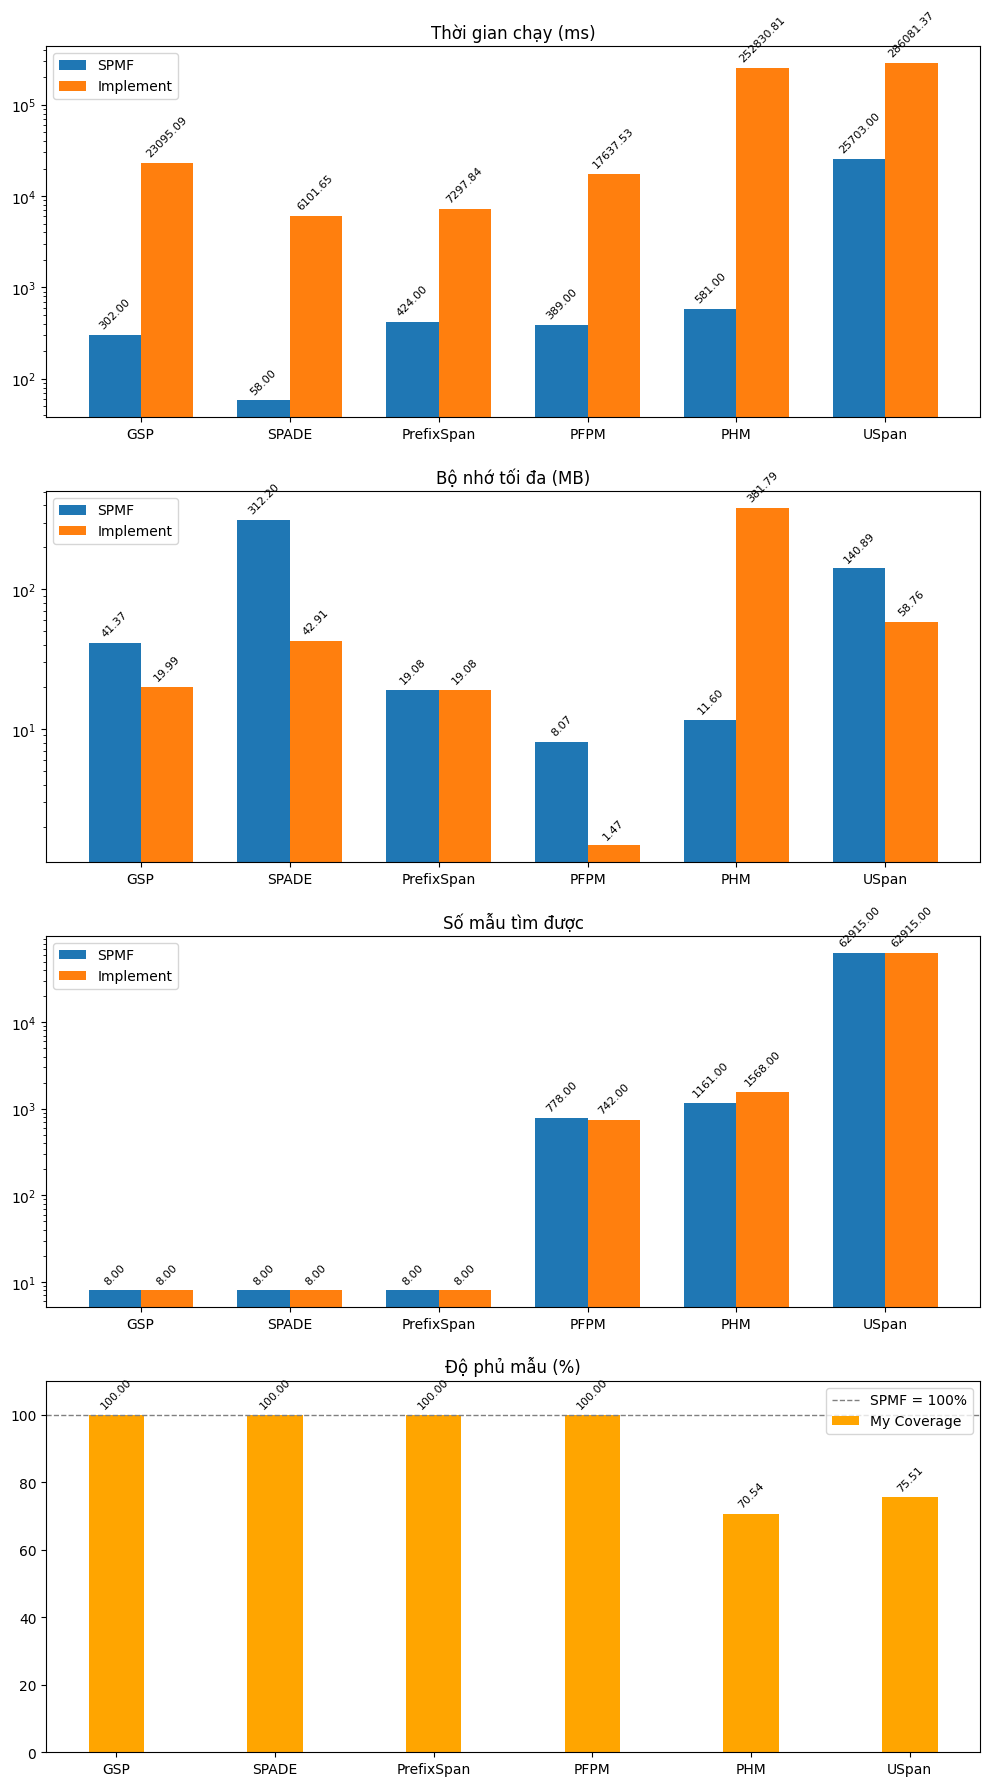

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def add_labels(ax, bars):
    """Thêm giá trị thực lên trên đỉnh của mỗi cột."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', # Định dạng số thập phân, nếu cần
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8, rotation=45) # Tùy chỉnh kích thước font và xoay chữ để dễ đọc

# Tên thuật toán
algorithms = ["GSP", "SPADE", "PrefixSpan", "PFPM", "PHM", "USpan"]

# Dữ liệu
time_spmf = [302, 58, 424, 389, 581, 25703]
time_my   = [23095.09, 6101.65, 7297.84, 17637.53, 252830.81, 286081.37]

mem_spmf = [41.37, 312.20, 19.08, 8.07, 11.60, 140.89]
mem_my   = [19.99, 42.91, 19.08, 1.47, 381.79, 58.76]

patterns_spmf = [8, 8, 8, 778, 1161, 62915]
patterns_my   = [8, 8, 8, 742, 1568, 62915]

coverage = [100, 100, 100, 100, 70.54, 75.51]

# Kiểm tra đồng bộ dữ liệu
n_algo = len(algorithms)
x = np.arange(n_algo)
width = 0.35

fig, axes = plt.subplots(4, 1, figsize=(10, 18))
axes = axes.flatten()

# 1. Thời gian chạy (s) - Dùng log-scale và thêm nhãn
bars1 = axes[0].bar(x - width/2, time_spmf, width, label="SPMF")
bars2 = axes[0].bar(x + width/2, time_my, width, label="Implement")
axes[0].set_title("Thời gian chạy (ms)")
axes[0].set_xticks(x, algorithms)
axes[0].set_yscale('log')
axes[0].legend()
add_labels(axes[0], bars1)
add_labels(axes[0], bars2)

# 2. Bộ nhớ tối đa (MB) - Dùng log-scale và thêm nhãn
bars3 = axes[1].bar(x - width/2, mem_spmf, width, label="SPMF")
bars4 = axes[1].bar(x + width/2, mem_my, width, label="Implement")
axes[1].set_title("Bộ nhớ tối đa (MB)")
axes[1].set_xticks(x, algorithms)
axes[1].set_yscale('log')
axes[1].legend()
add_labels(axes[1], bars3)
add_labels(axes[1], bars4)

# 3. Số mẫu tìm được - Thêm nhãn
bars5 = axes[2].bar(x - width/2, patterns_spmf, width, label="SPMF")
bars6 = axes[2].bar(x + width/2, patterns_my, width, label="Implement")
axes[2].set_title("Số mẫu tìm được")
axes[2].set_xticks(x, algorithms)
axes[2].set_yscale('log')
axes[2].legend()
add_labels(axes[2], bars5)
add_labels(axes[2], bars6)

# 4. Độ phủ mẫu (%) - Thêm nhãn
bars7 = axes[3].bar(x, coverage, width, color="orange", label="My Coverage")
axes[3].axhline(100, color="gray", linestyle="--", linewidth=1, label="SPMF = 100%")
axes[3].set_title("Độ phủ mẫu (%)")
axes[3].set_xticks(x, algorithms)
axes[3].set_ylim(0, 110) # Đặt giới hạn trục Y để nhãn không bị cắt
axes[3].legend()
add_labels(axes[3], bars7)

plt.tight_layout()
plt.show()

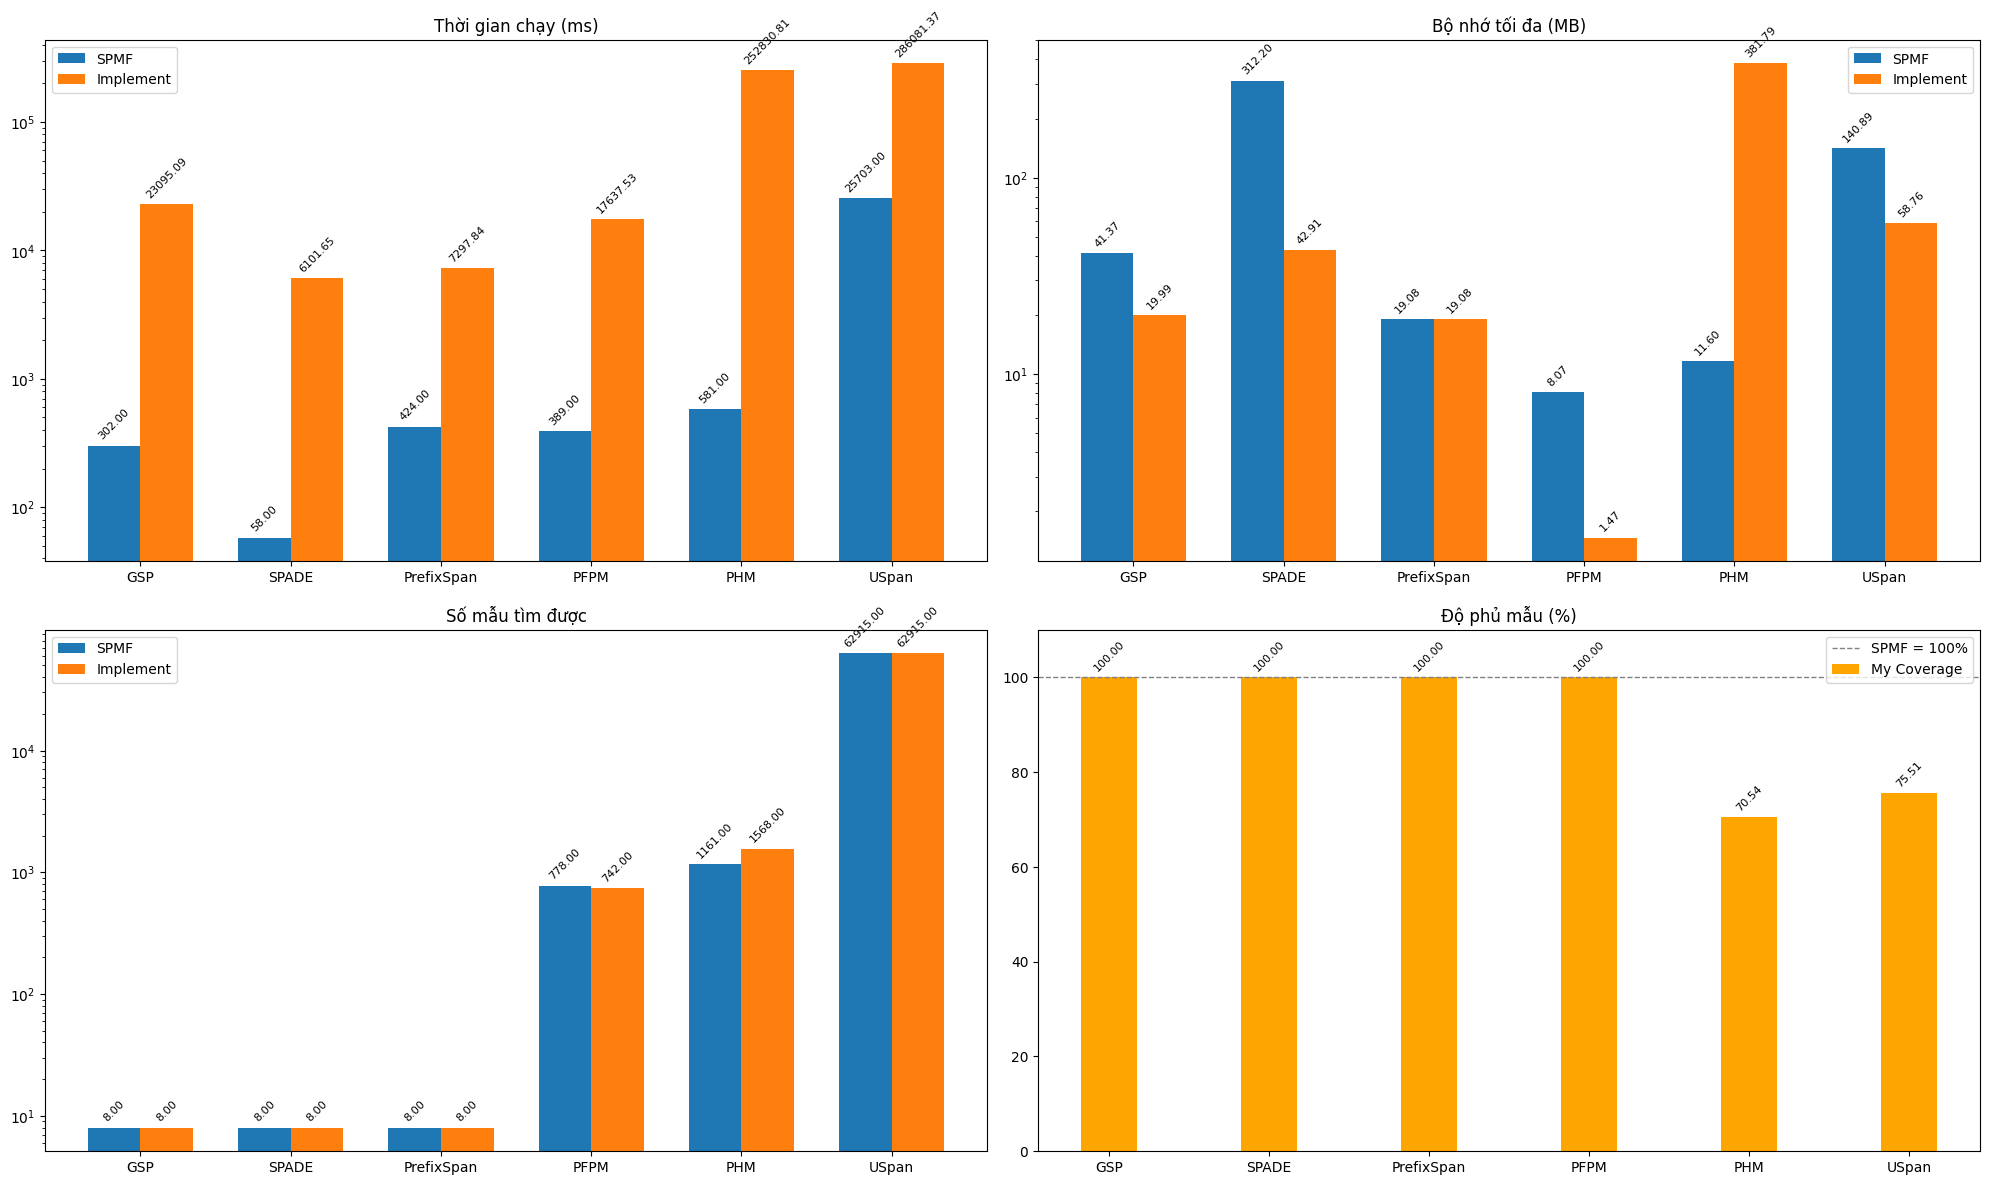

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def add_labels(ax, bars):
    """Thêm giá trị thực lên trên đỉnh của mỗi cột."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', # Định dạng số thập phân, nếu cần
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8, rotation=45) # Tùy chỉnh kích thước font và xoay chữ để dễ đọc

# Tên thuật toán
algorithms = ["GSP", "SPADE", "PrefixSpan", "PFPM", "PHM", "USpan"]

# Dữ liệu
time_spmf = [302, 58, 424, 389, 581, 25703]
time_my   = [23095.09, 6101.65, 7297.84, 17637.53, 252830.81, 286081.37]

mem_spmf = [41.37, 312.20, 19.08, 8.07, 11.60, 140.89]
mem_my   = [19.99, 42.91, 19.08, 1.47, 381.79, 58.76]

patterns_spmf = [8, 8, 8, 778, 1161, 62915]
patterns_my   = [8, 8, 8, 742, 1568, 62915]

coverage = [100, 100, 100, 100, 70.54, 75.51]

# Kiểm tra đồng bộ dữ liệu
n_algo = len(algorithms)
x = np.arange(n_algo)
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

# 1. Thời gian chạy (s) - Dùng log-scale và thêm nhãn
bars1 = axes[0].bar(x - width/2, time_spmf, width, label="SPMF")
bars2 = axes[0].bar(x + width/2, time_my, width, label="Implement")
axes[0].set_title("Thời gian chạy (ms)")
axes[0].set_xticks(x, algorithms)
axes[0].set_yscale('log')
axes[0].legend()
add_labels(axes[0], bars1)
add_labels(axes[0], bars2)

# 2. Bộ nhớ tối đa (MB) - Dùng log-scale và thêm nhãn
bars3 = axes[1].bar(x - width/2, mem_spmf, width, label="SPMF")
bars4 = axes[1].bar(x + width/2, mem_my, width, label="Implement")
axes[1].set_title("Bộ nhớ tối đa (MB)")
axes[1].set_xticks(x, algorithms)
axes[1].set_yscale('log')
axes[1].legend()
add_labels(axes[1], bars3)
add_labels(axes[1], bars4)

# 3. Số mẫu tìm được - Thêm nhãn
bars5 = axes[2].bar(x - width/2, patterns_spmf, width, label="SPMF")
bars6 = axes[2].bar(x + width/2, patterns_my, width, label="Implement")
axes[2].set_title("Số mẫu tìm được")
axes[2].set_xticks(x, algorithms)
axes[2].set_yscale('log')
axes[2].legend()
add_labels(axes[2], bars5)
add_labels(axes[2], bars6)

# 4. Độ phủ mẫu (%) - Thêm nhãn
bars7 = axes[3].bar(x, coverage, width, color="orange", label="My Coverage")
axes[3].axhline(100, color="gray", linestyle="--", linewidth=1, label="SPMF = 100%")
axes[3].set_title("Độ phủ mẫu (%)")
axes[3].set_xticks(x, algorithms)
axes[3].set_ylim(0, 110) # Đặt giới hạn trục Y để nhãn không bị cắt
axes[3].legend()
add_labels(axes[3], bars7)

plt.tight_layout()
plt.show()